# IMPORT DATASET

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_og = pd.read_excel('dataset.xlsx')
df = df_og.copy(deep = True)
df.head()

,DATE_TIME,CB_FLOW,CB_PRESS,CB_TEMP,STEAM_FLOW,STEAM_TEMP,STEAM_PRESS,O2_PRESS,O2_FLOW,O2_PER,...,TOP_TEMP2,TOP_TEMP3,TOP_TEMP4,TOP_SPRAY,TOP_TEMP,TOP_PRESS_1,CO,CO2,H2,SKIN_TEMP_AVG
0,01-07-21 00:10,311727.0,3.15,129.0,4.0,213.0,3.34,3.20,7296.0,23.08,...,135.0,107.0,130.0,0.0,121.0,2.0,22.22,21.00,3.88,69.940478
1,01-07-21 00:20,315163.0,3.16,129.0,4.0,209.0,3.35,3.20,7829.0,23.08,...,143.0,109.0,128.0,0.0,125.0,1.0,22.56,21.00,3.94,71.454476
2,01-07-21 00:30,314595.0,3.16,128.0,4.0,205.0,3.35,3.21,7904.0,23.08,...,138.0,110.0,124.0,0.0,124.0,1.0,22.49,21.08,3.94,70.579462
3,01-07-21 00:40,312465.0,3.16,127.0,4.0,200.0,3.35,3.21,7919.0,23.08,...,128.0,102.0,110.0,0.0,115.0,1.0,22.36,21.13,3.99,70.179791
4,01-07-21 00:50,302981.0,3.11,126.0,4.0,194.0,3.29,3.16,7938.0,23.08,...,139.0,112.0,124.0,0.0,125.0,1.0,22.25,21.30,4.10,70.728470


# DATA CLEANING

Assumed steps are as follows:
- Remove unnecessary data
- Convert DATE_TIME to datetime
- Generate distribution graph and:
    - Find fill strategy for NaN values
- Develop algorithm for converting 10min dataset to 1hr dataset

### Removing unnecessary data

In [2]:
df.drop(['TOP_TEMP1', 'TOP_TEMP2', 'TOP_TEMP3', 'TOP_TEMP4', 'TOP_PRESS_1'], axis = 1, inplace = True)
df.head()

,DATE_TIME,CB_FLOW,CB_PRESS,CB_TEMP,STEAM_FLOW,STEAM_TEMP,STEAM_PRESS,O2_PRESS,O2_FLOW,O2_PER,...,ATM_HUMID,HB_TEMP,HB_PRESS,TOP_PRESS,TOP_SPRAY,TOP_TEMP,CO,CO2,H2,SKIN_TEMP_AVG
0,01-07-21 00:10,311727.0,3.15,129.0,4.0,213.0,3.34,3.20,7296.0,23.08,...,24.56,1060.0,2.99,1.50,0.0,121.0,22.22,21.00,3.88,69.940478
1,01-07-21 00:20,315163.0,3.16,129.0,4.0,209.0,3.35,3.20,7829.0,23.08,...,24.52,1058.0,2.99,1.49,0.0,125.0,22.56,21.00,3.94,71.454476
2,01-07-21 00:30,314595.0,3.16,128.0,4.0,205.0,3.35,3.21,7904.0,23.08,...,24.53,1058.0,2.99,1.49,0.0,124.0,22.49,21.08,3.94,70.579462
3,01-07-21 00:40,312465.0,3.16,127.0,4.0,200.0,3.35,3.21,7919.0,23.08,...,25.06,1057.0,2.99,1.49,0.0,115.0,22.36,21.13,3.99,70.179791
4,01-07-21 00:50,302981.0,3.11,126.0,4.0,194.0,3.29,3.16,7938.0,23.08,...,25.36,1057.0,2.94,1.49,0.0,125.0,22.25,21.30,4.10,70.728470


In [3]:
df.DATE_TIME = pd.to_datetime(df.DATE_TIME, format = "%d-%m-%y %H:%M")

In [4]:
df.head()

,DATE_TIME,CB_FLOW,CB_PRESS,CB_TEMP,STEAM_FLOW,STEAM_TEMP,STEAM_PRESS,O2_PRESS,O2_FLOW,O2_PER,...,ATM_HUMID,HB_TEMP,HB_PRESS,TOP_PRESS,TOP_SPRAY,TOP_TEMP,CO,CO2,H2,SKIN_TEMP_AVG
0,2021-07-01 00:10:00,311727.0,3.15,129.0,4.0,213.0,3.34,3.20,7296.0,23.08,...,24.56,1060.0,2.99,1.50,0.0,121.0,22.22,21.00,3.88,69.940478
1,2021-07-01 00:20:00,315163.0,3.16,129.0,4.0,209.0,3.35,3.20,7829.0,23.08,...,24.52,1058.0,2.99,1.49,0.0,125.0,22.56,21.00,3.94,71.454476
2,2021-07-01 00:30:00,314595.0,3.16,128.0,4.0,205.0,3.35,3.21,7904.0,23.08,...,24.53,1058.0,2.99,1.49,0.0,124.0,22.49,21.08,3.94,70.579462
3,2021-07-01 00:40:00,312465.0,3.16,127.0,4.0,200.0,3.35,3.21,7919.0,23.08,...,25.06,1057.0,2.99,1.49,0.0,115.0,22.36,21.13,3.99,70.179791
4,2021-07-01 00:50:00,302981.0,3.11,126.0,4.0,194.0,3.29,3.16,7938.0,23.08,...,25.36,1057.0,2.94,1.49,0.0,125.0,22.25,21.30,4.10,70.728470


### Dealing with NaN values

In [5]:
def plot_vals(df, cmp_df=None):
    for feature in df.columns:

        plt.figure()  # Create a new figure for each feature

        if cmp_df is not None:

            fig, ax = plt.subplots(1, 2, figsize=(14, 6))

            ax[0].hist(df[feature], bins='fd', label='df')
            ax[0].set_title(feature)
            ax[0].set_xlabel('Values')
            ax[0].set_ylabel('Frequency')

            ax[1].hist(cmp_df[feature], bins='fd', label='cmp_df', color = 'red')
            ax[1].set_title(feature+'(cmp_df)')
            ax[1].set_xlabel('Values')
            ax[1].set_ylabel('Frequency')

        else:

            plt.hist(df[feature], bins='fd')
            plt.title(feature)
            plt.ylabel("Dist.")
            plt.xlabel(feature)

    plt.show()

In [6]:
df.isna().sum()

DATE_TIME           0
CB_FLOW          2665
CB_PRESS           32
CB_TEMP            32
STEAM_FLOW       2665
STEAM_TEMP         32
STEAM_PRESS        32
O2_PRESS           32
O2_FLOW          2665
O2_PER             32
PCI              2665
ATM_HUMID          32
HB_TEMP          3817
HB_PRESS         2746
TOP_PRESS        2665
TOP_SPRAY          32
TOP_TEMP           32
CO               2665
CO2              2665
H2               2665
SKIN_TEMP_AVG      32
dtype: int64

- Remove null values in SKIN_TEMP_AVG

In [5]:
df.drop(df[df['SKIN_TEMP_AVG'].isna()].index, axis = 0, inplace = True)
df.isna().sum()

DATE_TIME           0
CB_FLOW          2633
CB_PRESS            0
CB_TEMP             0
STEAM_FLOW       2633
STEAM_TEMP          0
STEAM_PRESS         0
O2_PRESS            0
O2_FLOW          2633
O2_PER              0
PCI              2633
ATM_HUMID           0
HB_TEMP          3785
HB_PRESS         2714
TOP_PRESS        2633
TOP_SPRAY           0
TOP_TEMP            0
CO               2633
CO2              2633
H2               2633
SKIN_TEMP_AVG       0
dtype: int64

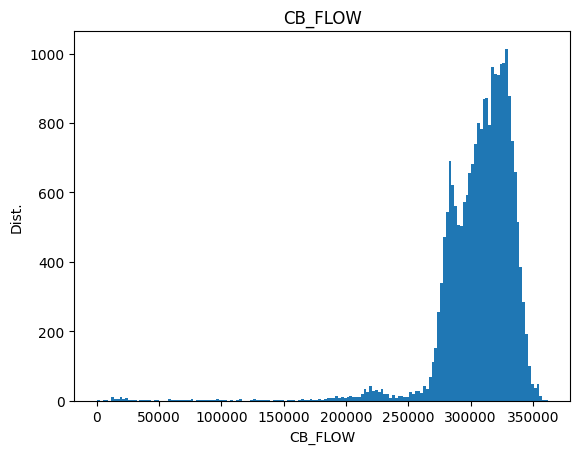

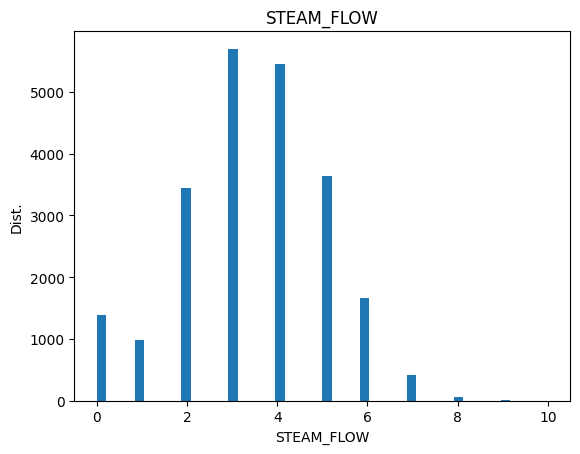

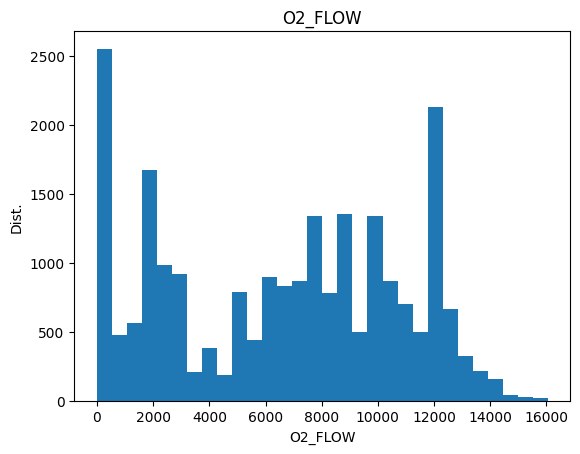

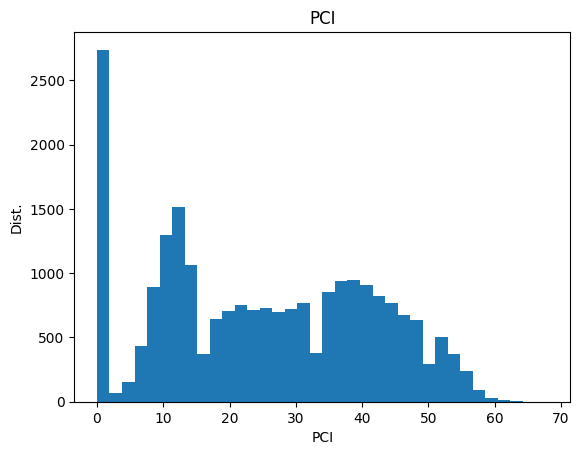

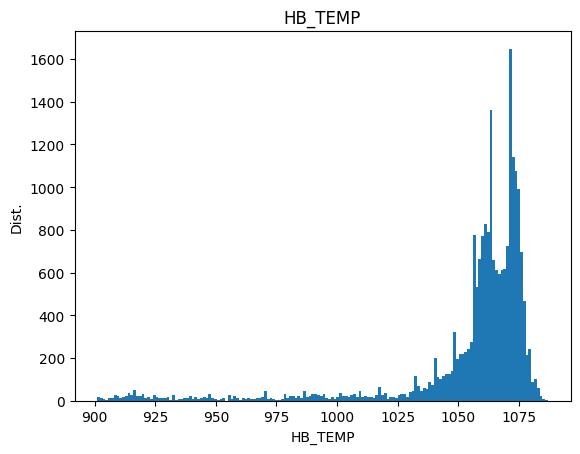

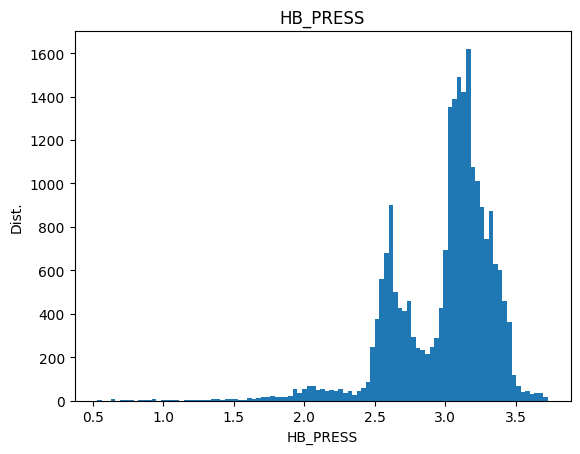

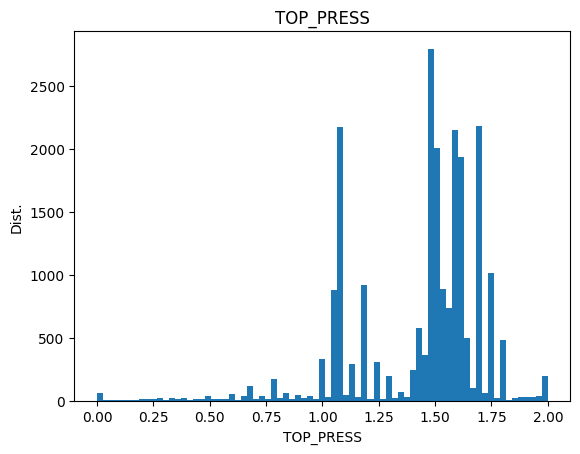

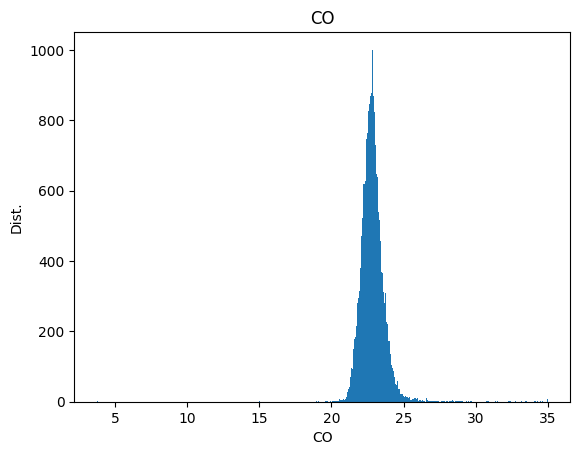

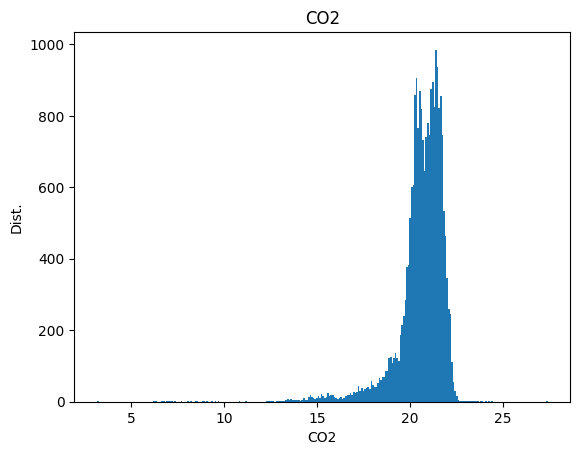

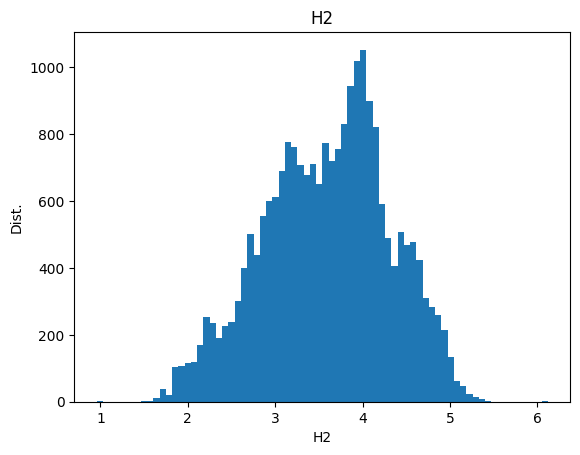

In [8]:
plot_vals(df[[col for col in df.columns if df.isna().sum()[col] != 0]], cmp_df= None)

In [9]:
print(df['STEAM_FLOW'].unique())

[ 4.  3.  5.  6.  2.  1.  0. nan  7.  8.  9. 10.]


### For checking if KNNImputer would be sufficient


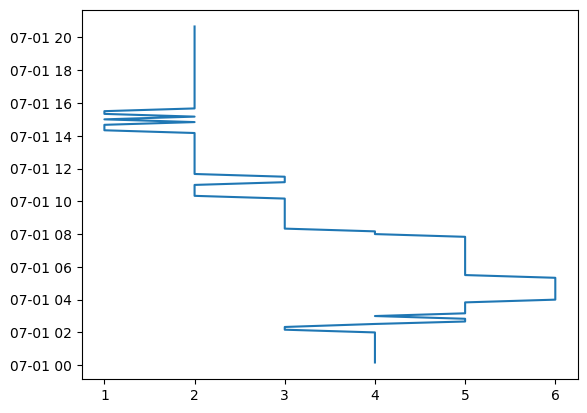

In [10]:
plt.plot(df['STEAM_FLOW'][0:120], df['DATE_TIME'][0:120])
plt.show()

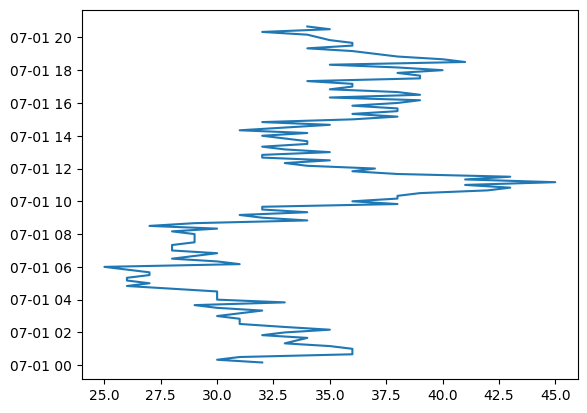

In [11]:
plt.plot(df['PCI'][0:120], df['DATE_TIME'][0:120])
plt.show()

Values are continuous. Mean of neighbors sufficient for missing values. So, KNN Imputer is good enough to fill NaN values

### Missing value columns are as follows
- CB_FLOW, HB_TEMP, CO(very mildly): skewed left
- STEAM_FLOW (value lies from 1 to 2): discrete
- O2_FLOW, PCI, CO2, HB_PRESS, TOP_PRESS: irregular
- H2: (near) Gaussian

### Since nearly 10% of values are missing for each feature listed above, we can use KNNImputer (statistical metric fill values WILL bias the dataset)

In [6]:
from sklearn.impute import KNNImputer
df_copy = df.copy(deep = True)
imputer = KNNImputer(n_neighbors = 6) # n_neighbors based on 1hr

df_copy.loc[:, [column for column in df_copy.columns if column != 'DATE_TIME']] = imputer.fit_transform(df_copy.loc[:, [column for column in df_copy.columns if column != 'DATE_TIME']])

# Rounding off the values to keep the column values discrete in nature
df_copy.loc[:, ['STEAM_FLOW',]] = np.round(df_copy.loc[:, ['STEAM_FLOW',]])

df_copy.isna().sum()

DATE_TIME        0
CB_FLOW          0
CB_PRESS         0
CB_TEMP          0
STEAM_FLOW       0
STEAM_TEMP       0
STEAM_PRESS      0
O2_PRESS         0
O2_FLOW          0
O2_PER           0
PCI              0
ATM_HUMID        0
HB_TEMP          0
HB_PRESS         0
TOP_PRESS        0
TOP_SPRAY        0
TOP_TEMP         0
CO               0
CO2              0
H2               0
SKIN_TEMP_AVG    0
dtype: int64

In [7]:
df = df_copy.copy(deep = True)

### Deriving SKIN_TEMP_AVG after 1,2,3,4 hrs as target features

In [8]:
feature_cols = ['SKIN_TEMP_AVG_1', 'SKIN_TEMP_AVG_2', 'SKIN_TEMP_AVG_3', 'SKIN_TEMP_AVG_4']

for i in range(1, 5):
    df[feature_cols[i-1]] = df['SKIN_TEMP_AVG'].shift(-6*i)

In [17]:
df.isna().sum()

DATE_TIME           0
CB_FLOW             0
CB_PRESS            0
CB_TEMP             0
STEAM_FLOW          0
STEAM_TEMP          0
STEAM_PRESS         0
O2_PRESS            0
O2_FLOW             0
O2_PER              0
PCI                 0
ATM_HUMID           0
HB_TEMP             0
HB_PRESS            0
TOP_PRESS           0
TOP_SPRAY           0
TOP_TEMP            0
CO                  0
CO2                 0
H2                  0
SKIN_TEMP_AVG       0
SKIN_TEMP_AVG_1     6
SKIN_TEMP_AVG_2    12
SKIN_TEMP_AVG_3    18
SKIN_TEMP_AVG_4    24
dtype: int64

In [9]:
df.dropna(inplace = True)

In [14]:
df.iloc[np.random.randint(df.shape[0]), :]

DATE_TIME          2021-08-12 02:40:00
CB_FLOW                       315236.0
CB_PRESS                           3.3
CB_TEMP                          135.0
STEAM_FLOW                         5.0
STEAM_TEMP                       232.0
STEAM_PRESS                       3.51
O2_PRESS                          3.35
O2_FLOW                         7970.0
O2_PER                           23.88
PCI                               26.0
ATM_HUMID                        24.69
HB_TEMP                         1066.0
HB_PRESS                          3.13
TOP_PRESS                          1.5
TOP_SPRAY                          0.2
TOP_TEMP                         136.0
CO                               22.13
CO2                               21.5
H2                                3.99
SKIN_TEMP_AVG               100.770885
SKIN_TEMP_AVG_1              99.680975
SKIN_TEMP_AVG_2             101.716252
SKIN_TEMP_AVG_3             101.332977
SKIN_TEMP_AVG_4             101.617599
Name: 5759, dtype: object

### After dealing with NaN values, 25373 feature values left (32 removed. Remaining filled using KNN algorithm/model)

# PREDICTIVE MODEL FITTING
 - Check the correlation

<Axes: >

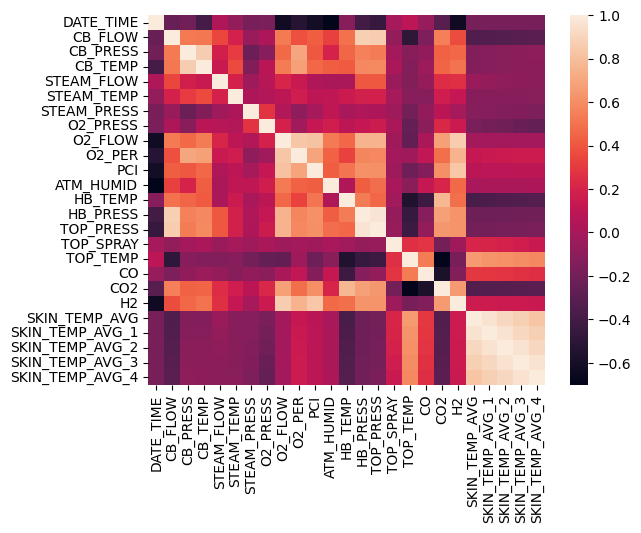

In [19]:
import seaborn as sns
sns.heatmap(df.corr())

### The heatmap suggests that there is no significant correlation between input and output variables

In [20]:
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from numpy import inf

excluded_cols = feature_cols + ['DATE_TIME', 'SKIN_TEMP_AVG'] # Excluding the target features and the date time column
X = df[[x for x in df.columns if x not in excluded_cols]]
y = df['SKIN_TEMP_AVG']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, shuffle = True)

#### Checking the effect of scaler on dataset

C:\Users\TheStarSlayer\AppData\Local\Temp\ipykernel_15512\3525858470.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()  # Create a new figure for each feature


<Figure size 640x480 with 0 Axes>

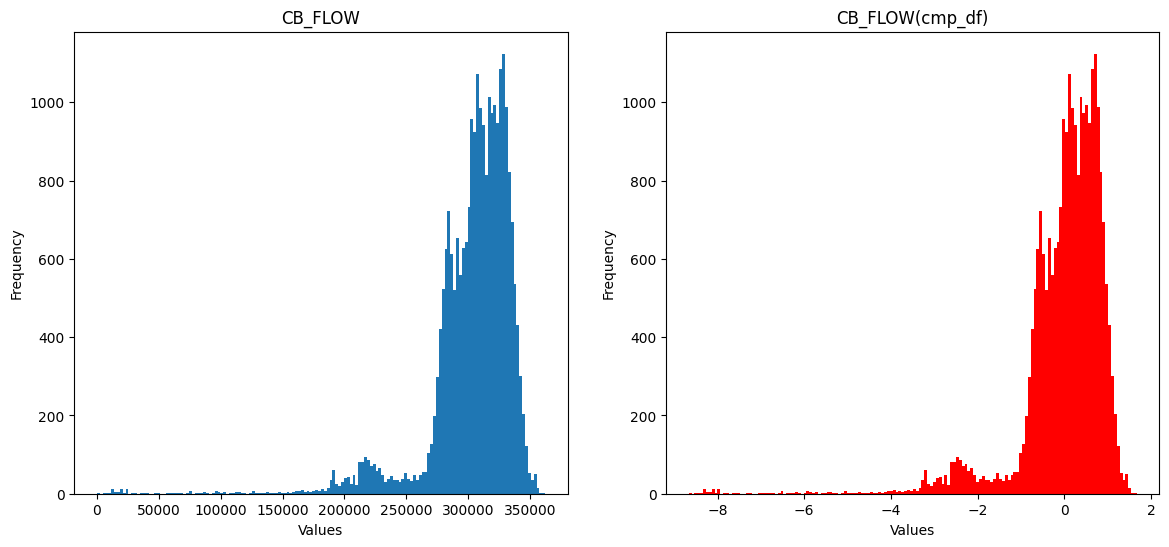

<Figure size 640x480 with 0 Axes>

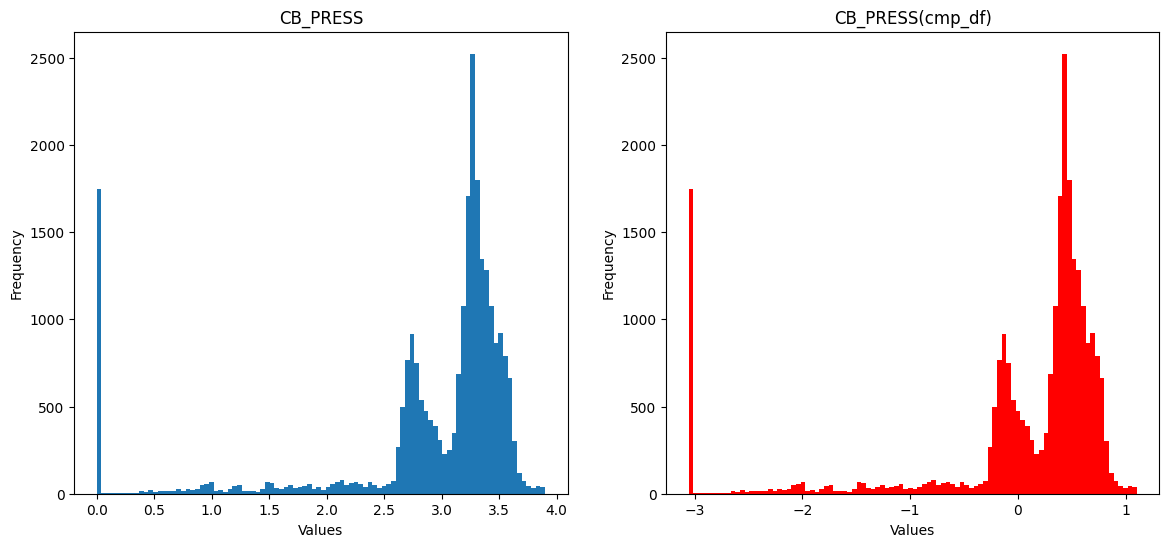

<Figure size 640x480 with 0 Axes>

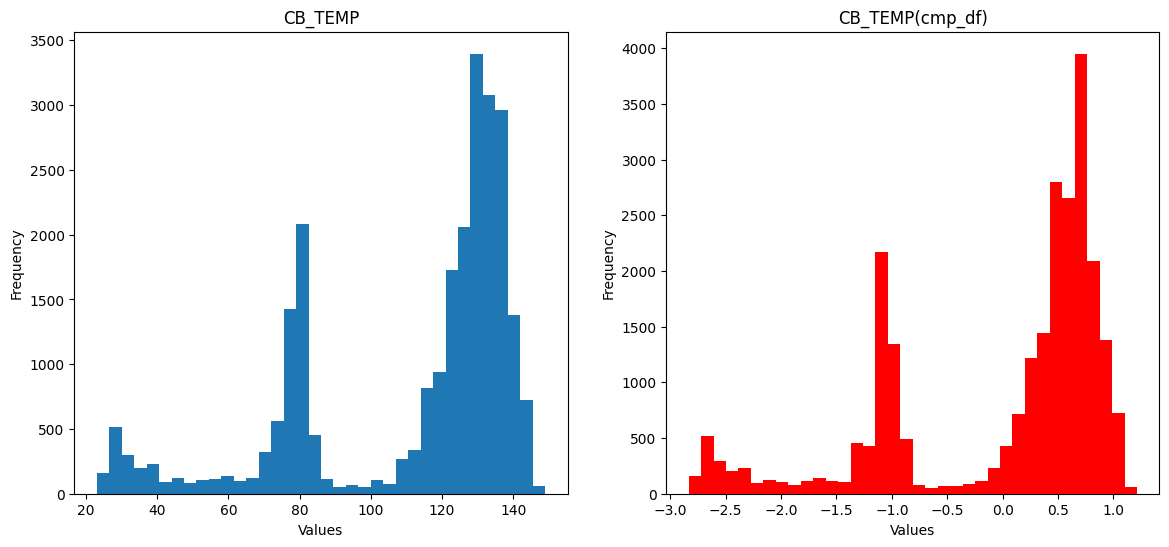

<Figure size 640x480 with 0 Axes>

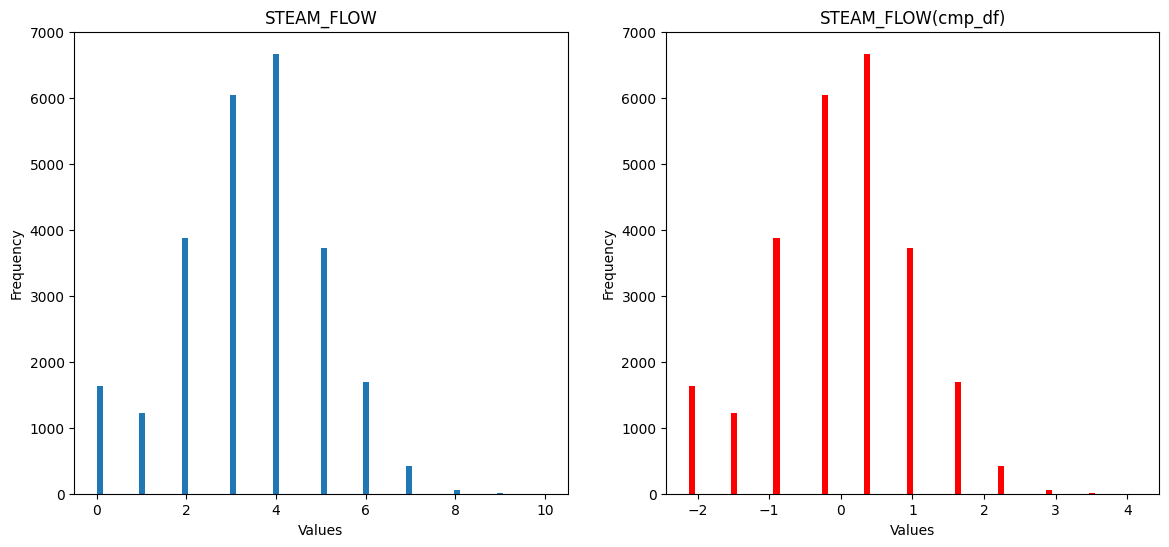

<Figure size 640x480 with 0 Axes>

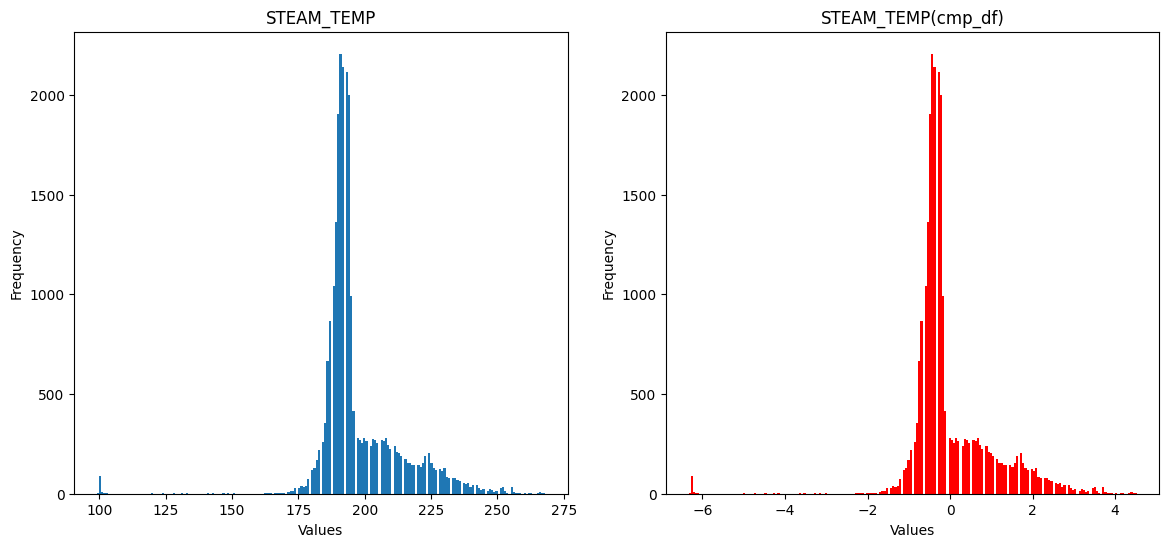

<Figure size 640x480 with 0 Axes>

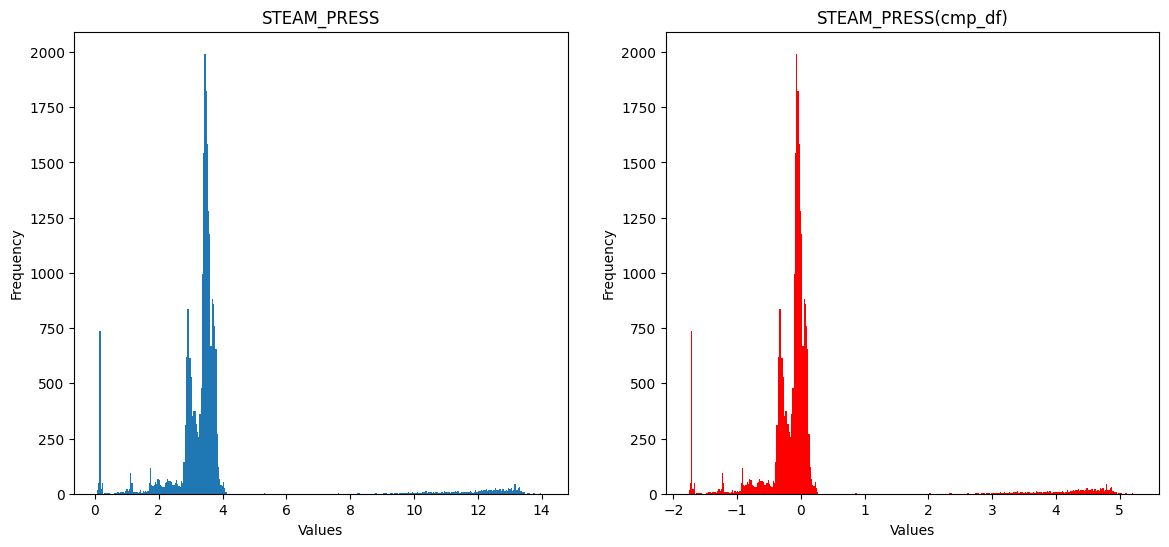

<Figure size 640x480 with 0 Axes>

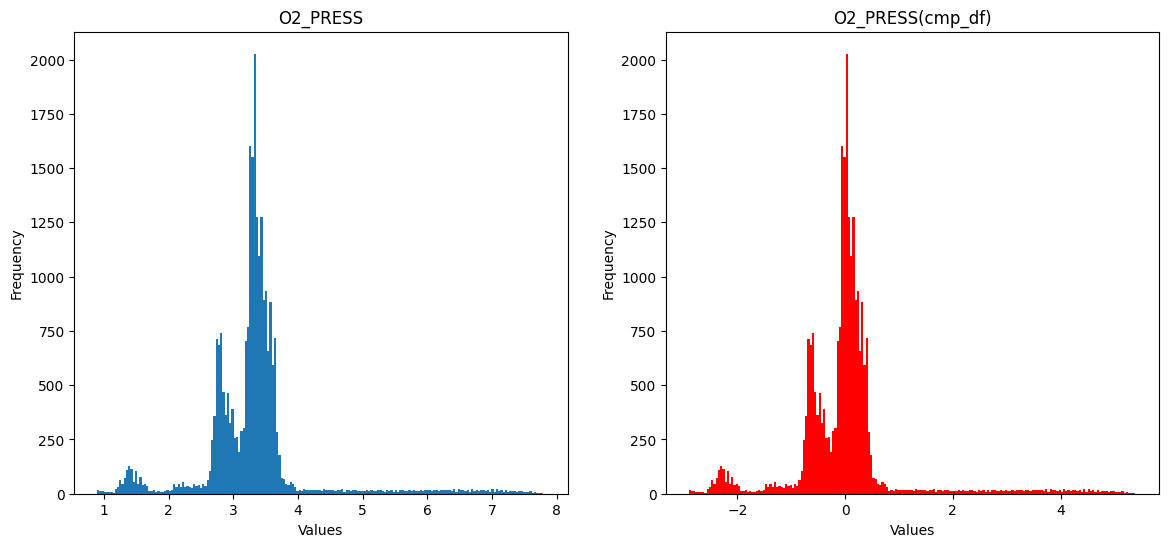

<Figure size 640x480 with 0 Axes>

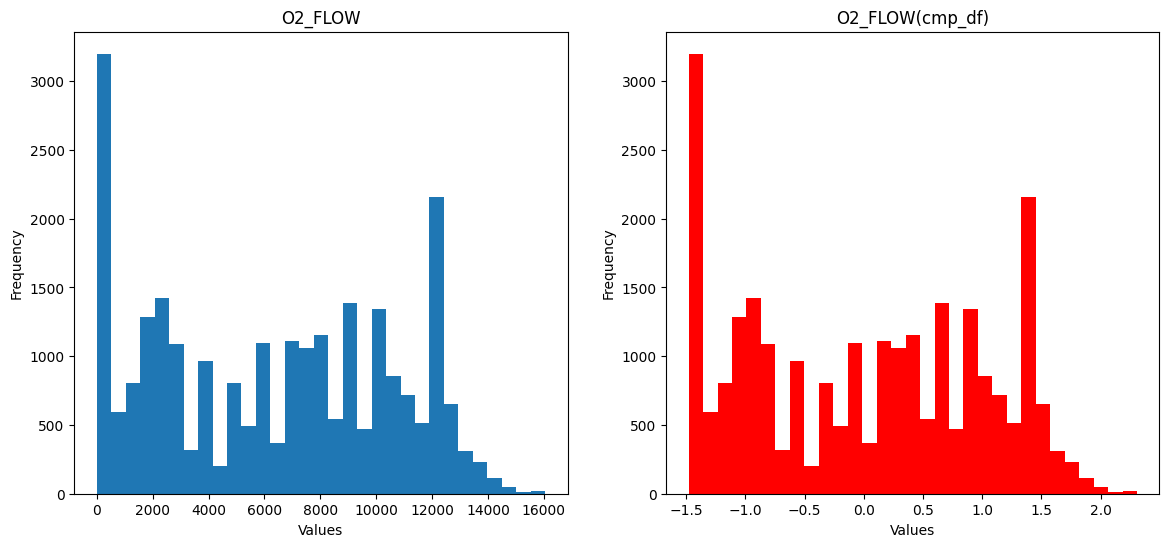

<Figure size 640x480 with 0 Axes>

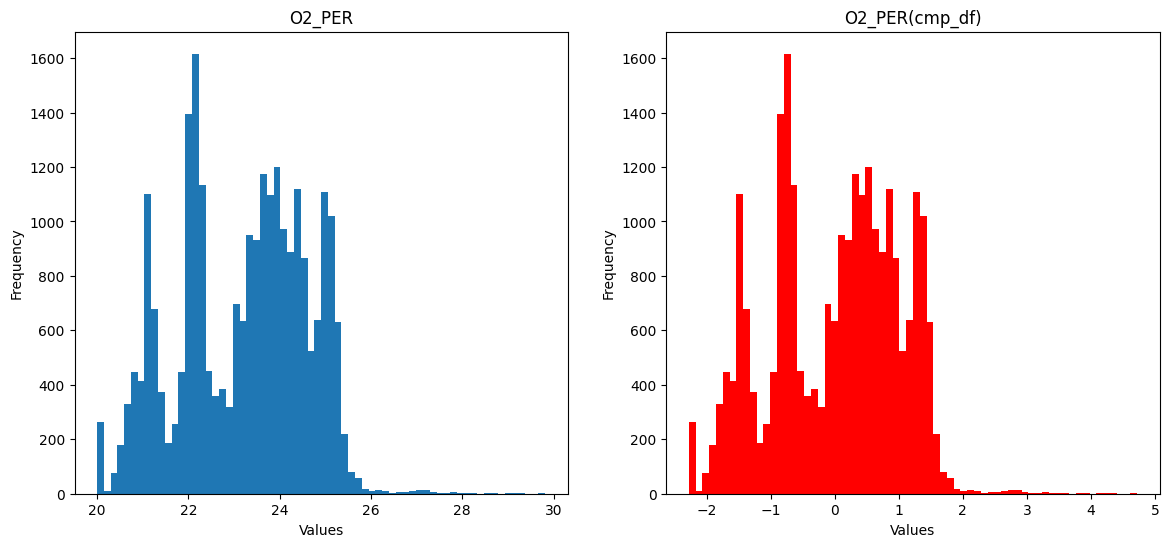

<Figure size 640x480 with 0 Axes>

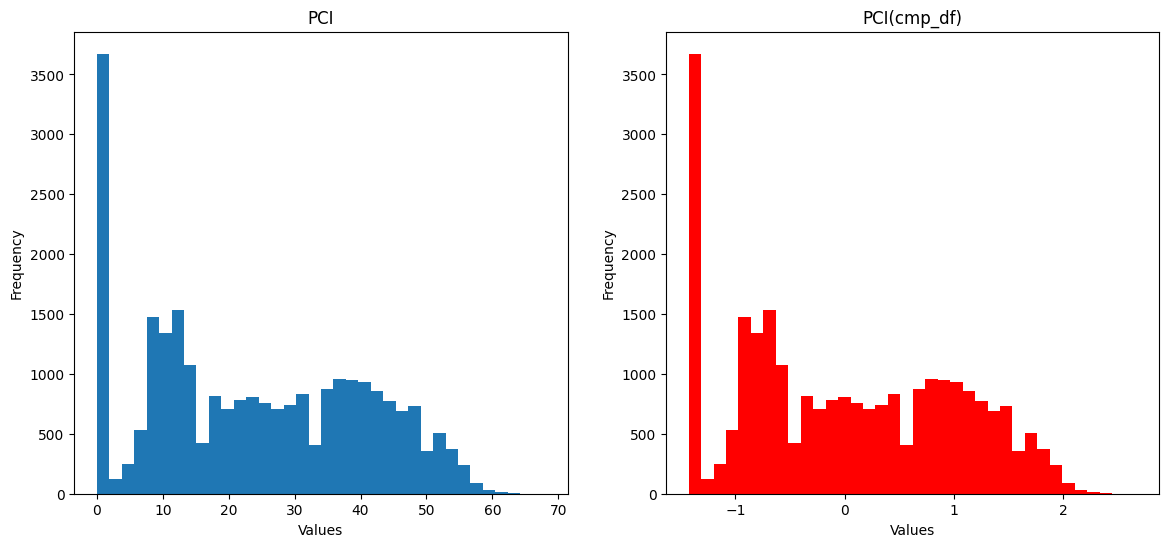

<Figure size 640x480 with 0 Axes>

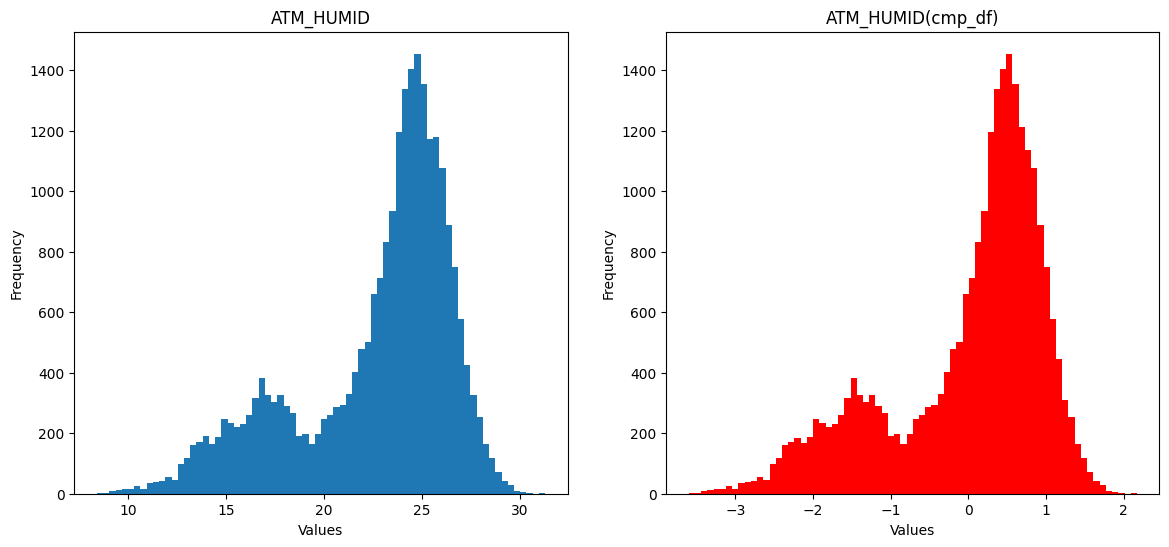

<Figure size 640x480 with 0 Axes>

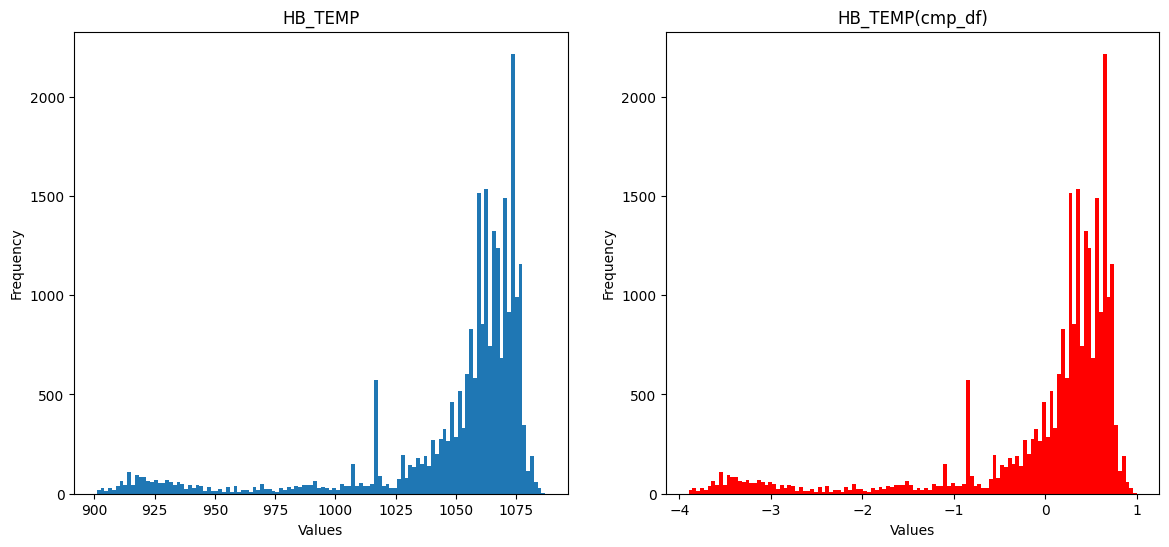

<Figure size 640x480 with 0 Axes>

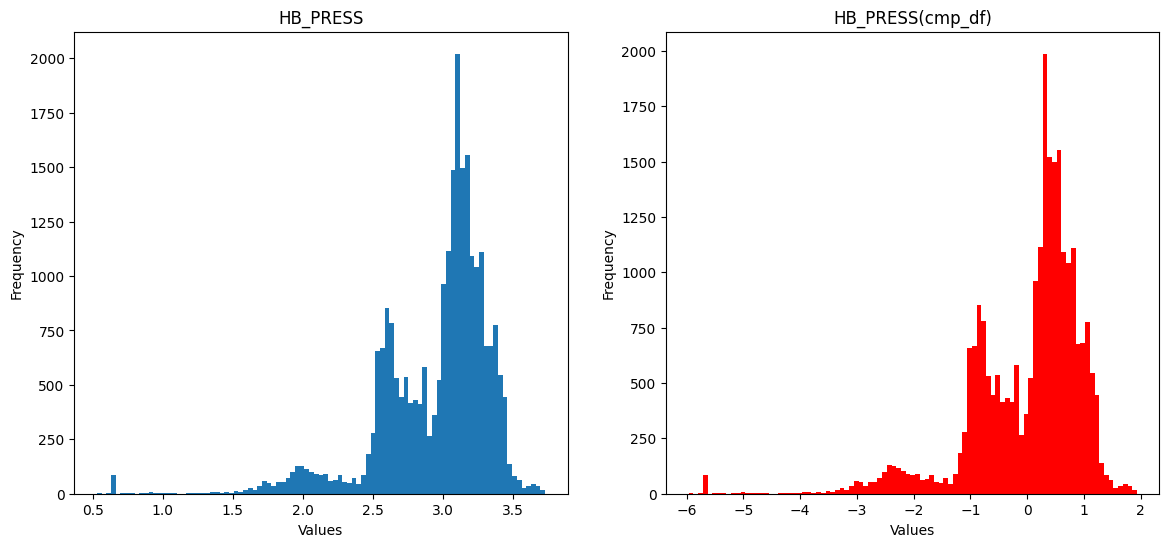

<Figure size 640x480 with 0 Axes>

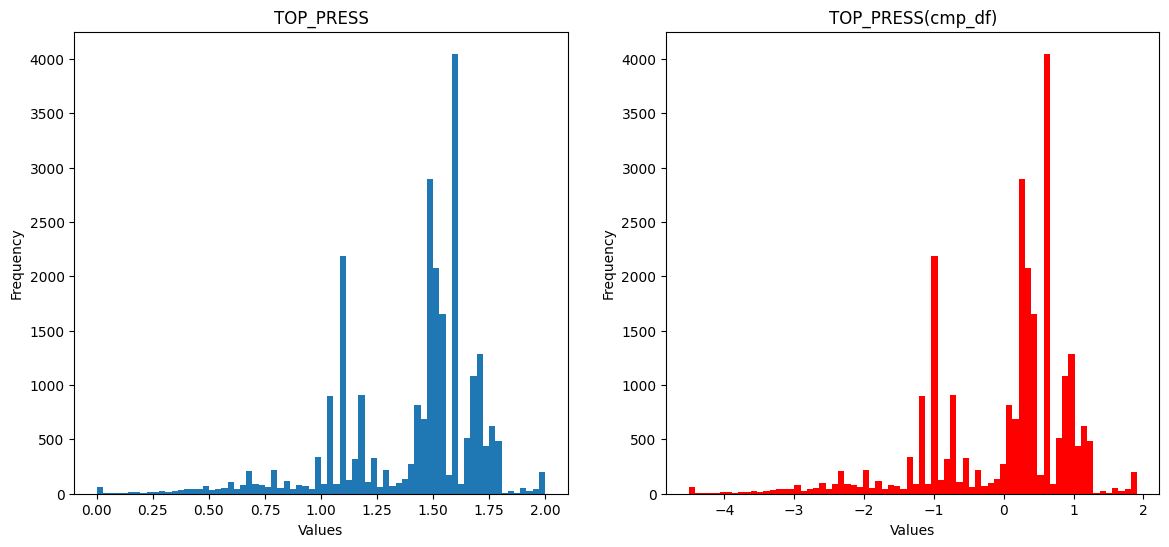

<Figure size 640x480 with 0 Axes>

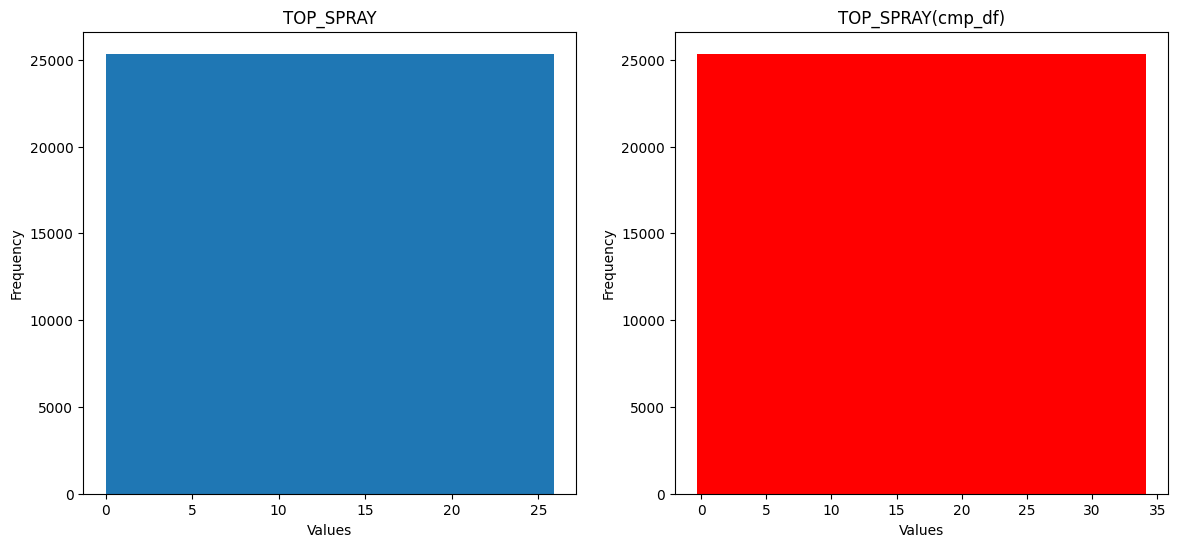

<Figure size 640x480 with 0 Axes>

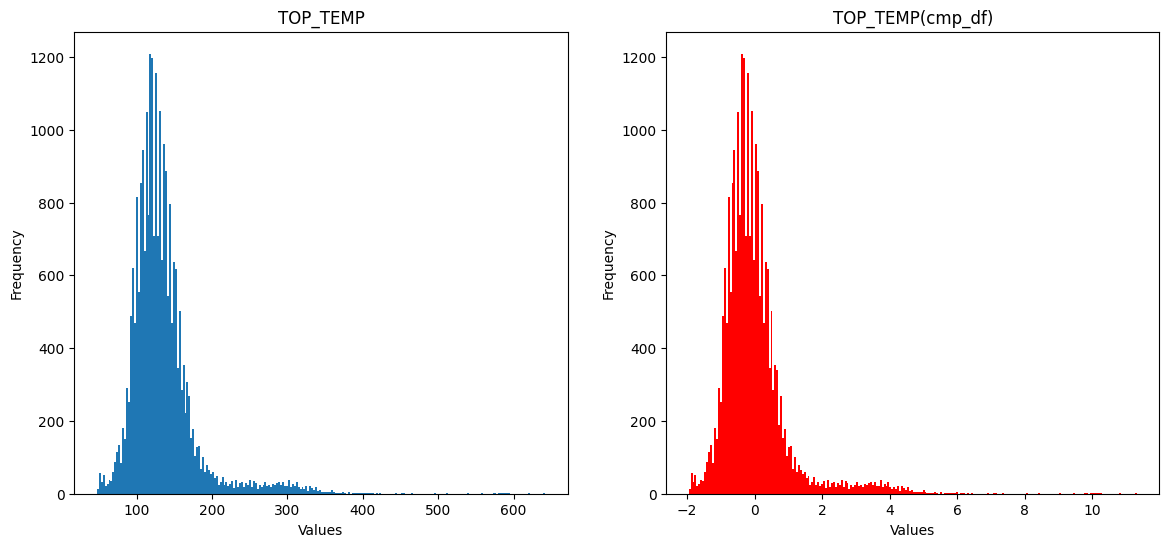

<Figure size 640x480 with 0 Axes>

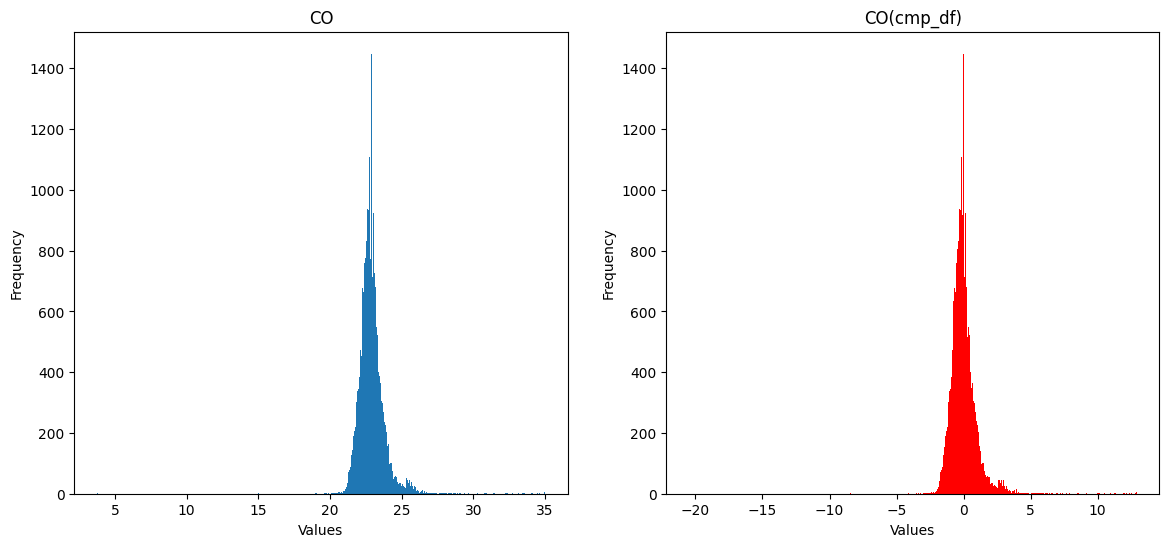

<Figure size 640x480 with 0 Axes>

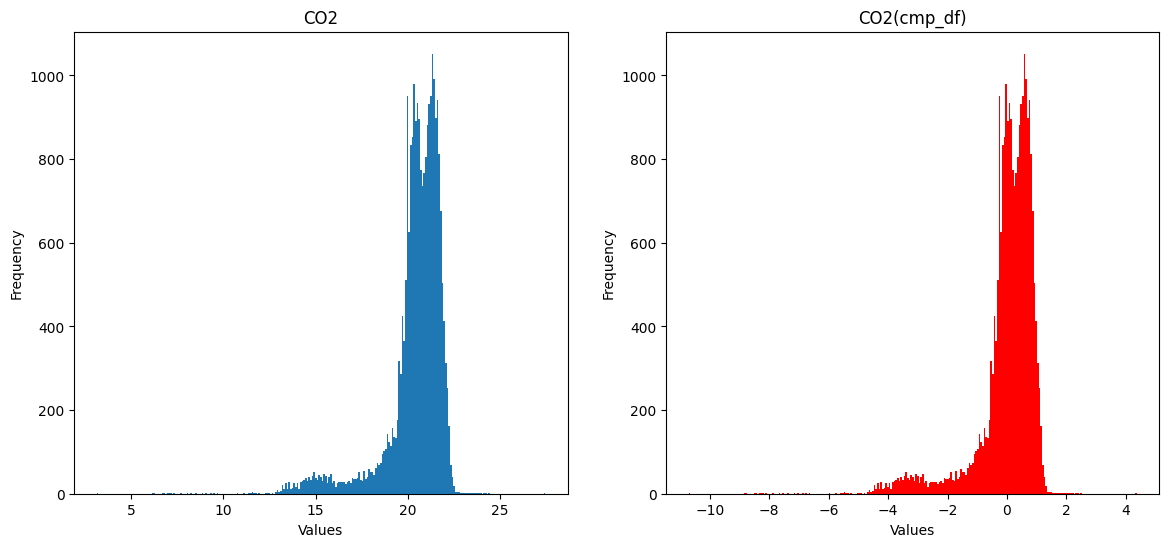

<Figure size 640x480 with 0 Axes>

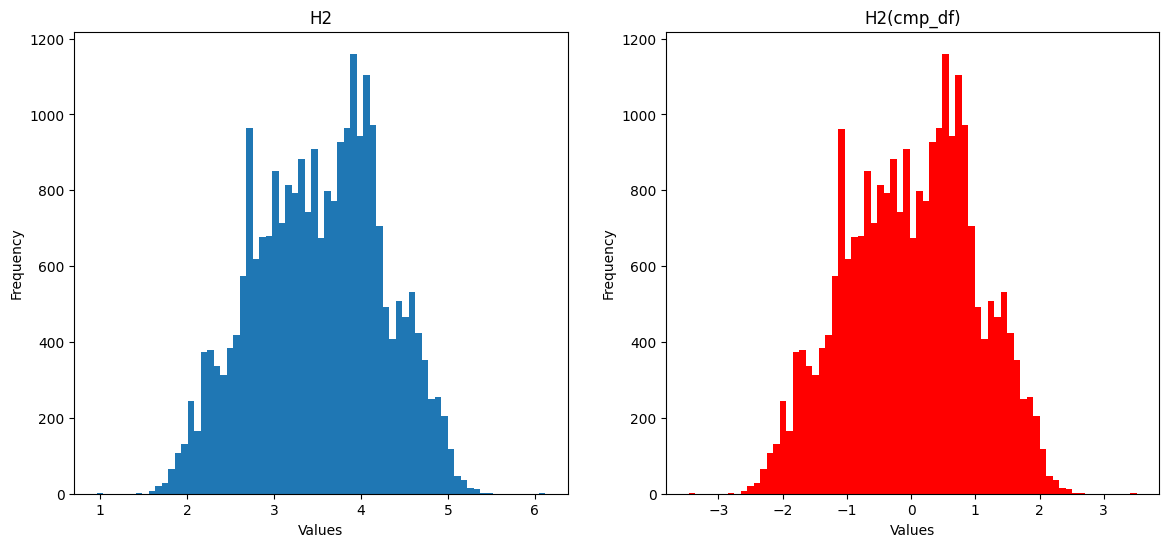

In [21]:
plot_vals(X, cmp_df = pd.DataFrame(StandardScaler().fit_transform(X), columns = X.columns))

C:\Users\TheStarSlayer\AppData\Local\Temp\ipykernel_15512\3525858470.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()  # Create a new figure for each feature


<Figure size 640x480 with 0 Axes>

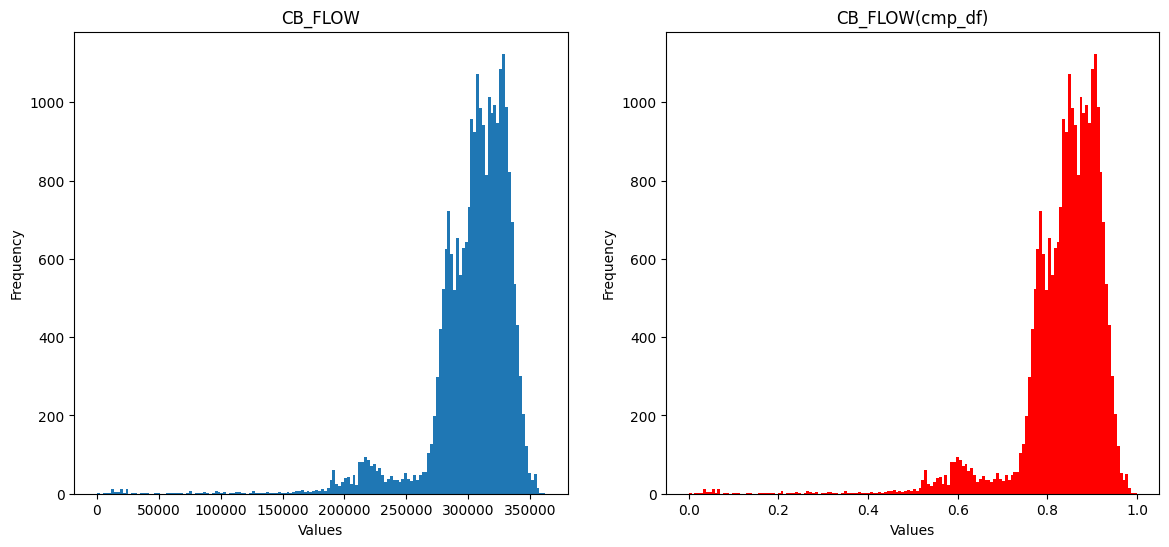

<Figure size 640x480 with 0 Axes>

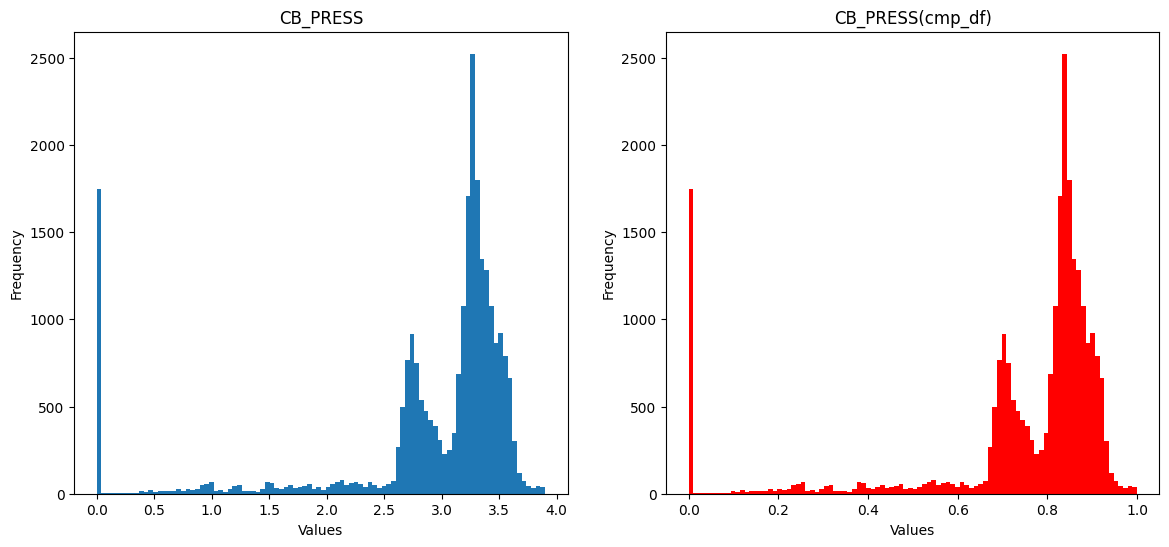

<Figure size 640x480 with 0 Axes>

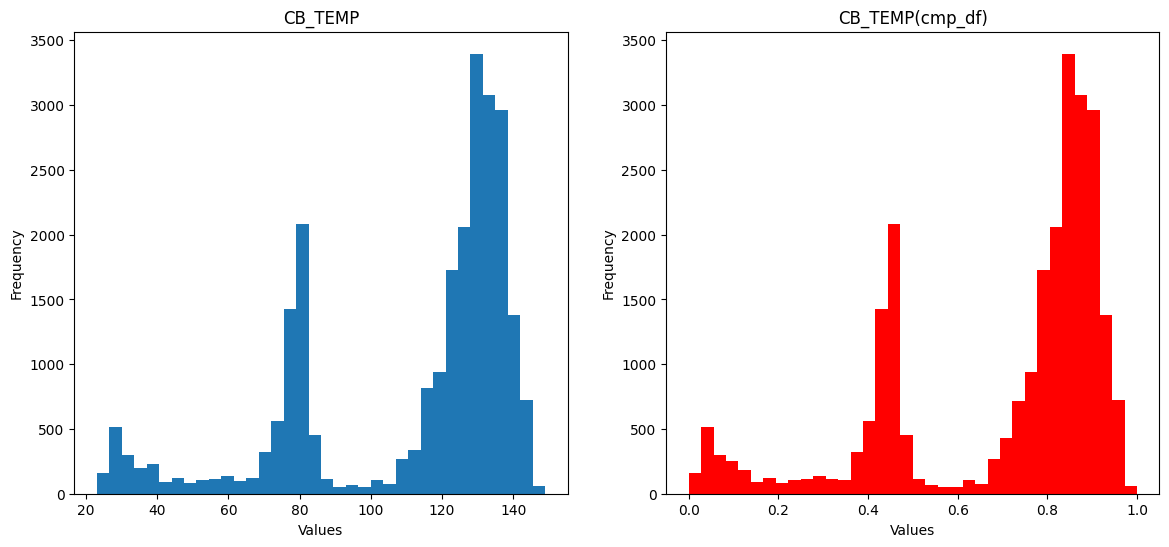

<Figure size 640x480 with 0 Axes>

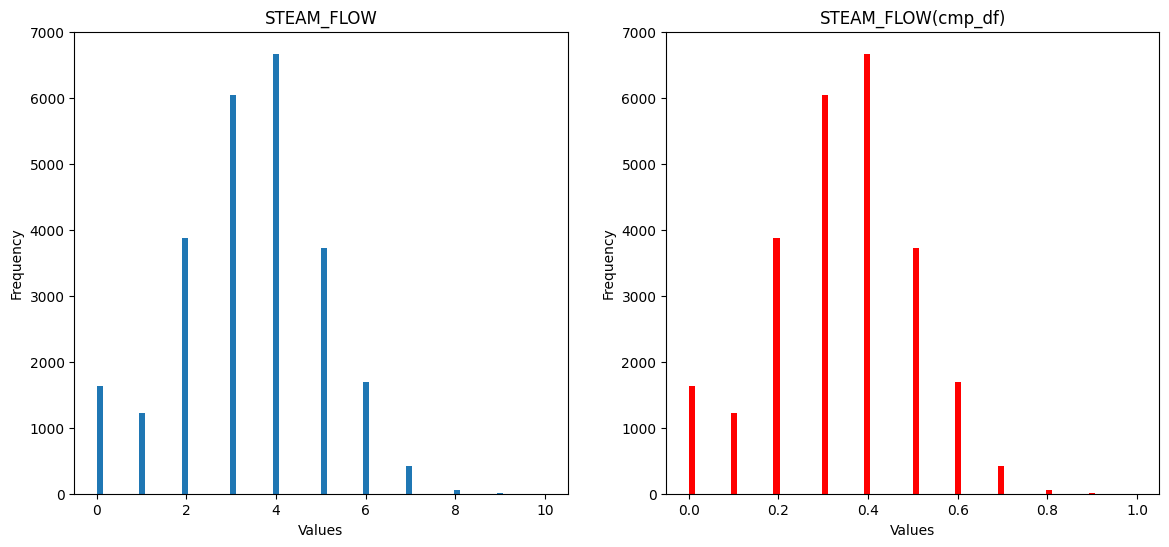

<Figure size 640x480 with 0 Axes>

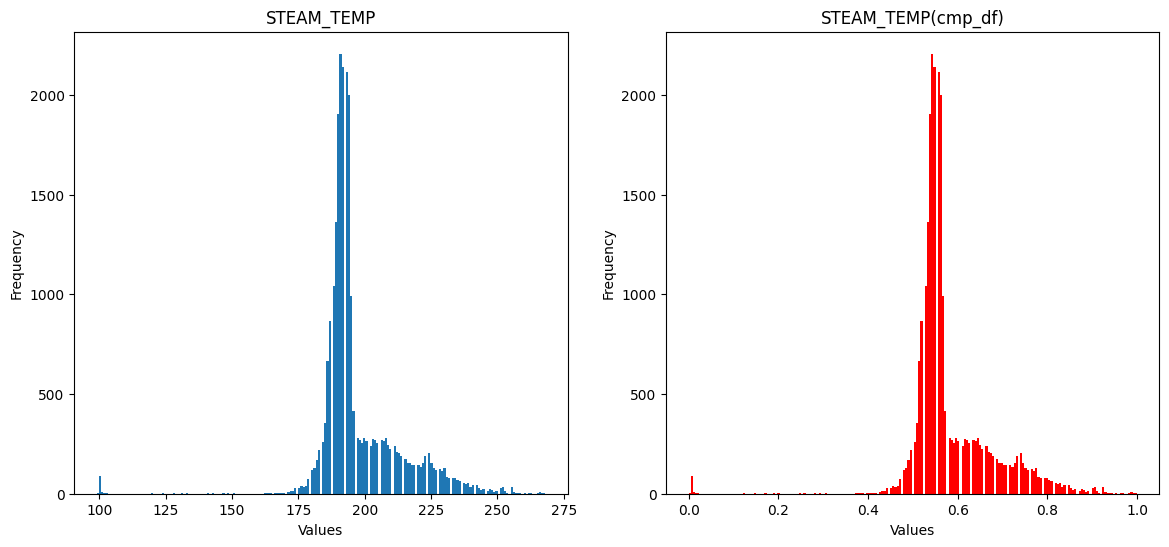

<Figure size 640x480 with 0 Axes>

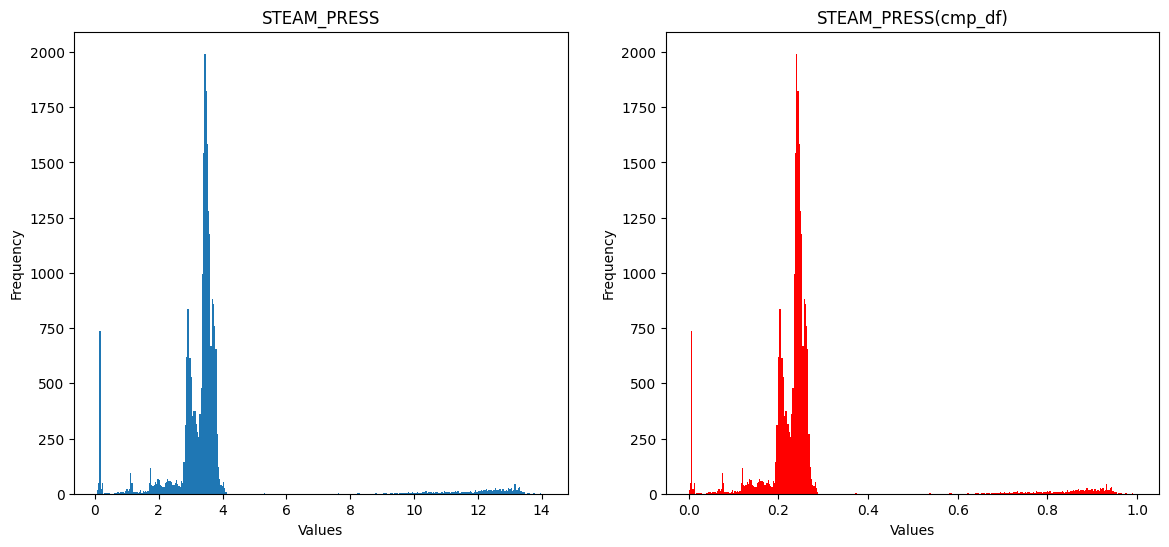

<Figure size 640x480 with 0 Axes>

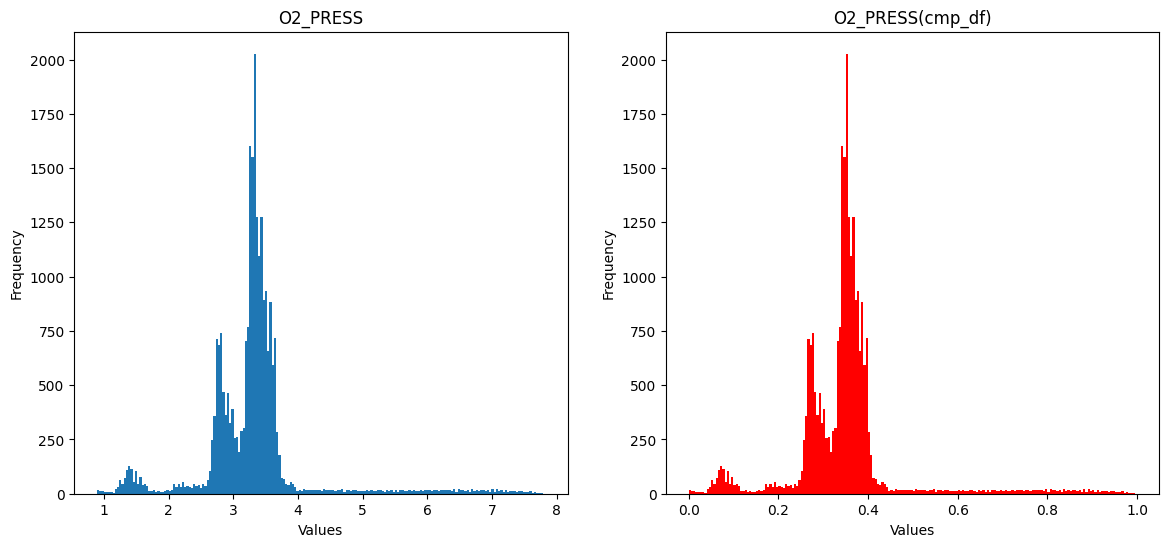

<Figure size 640x480 with 0 Axes>

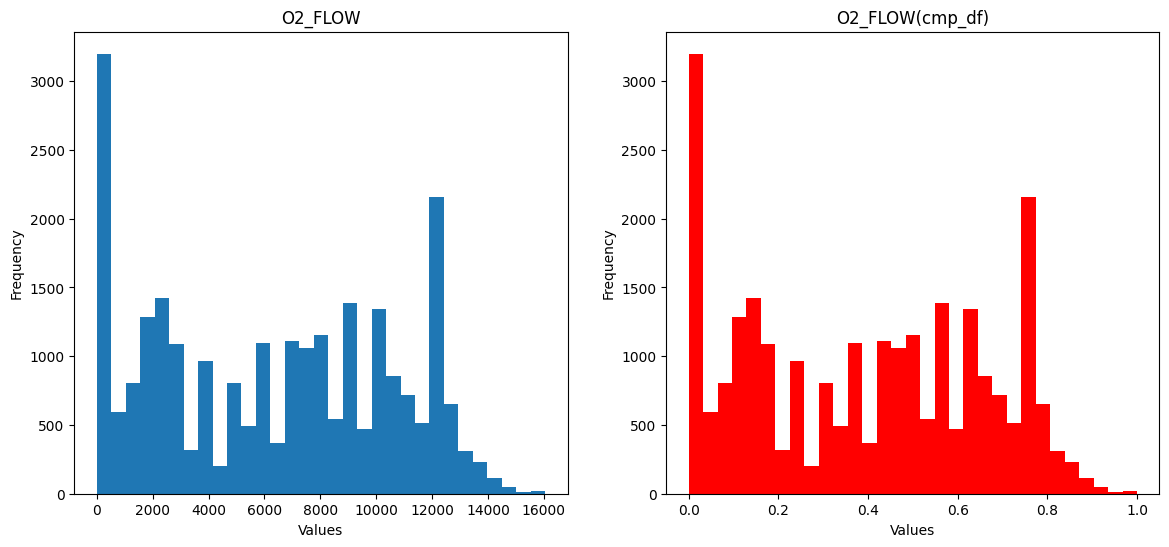

<Figure size 640x480 with 0 Axes>

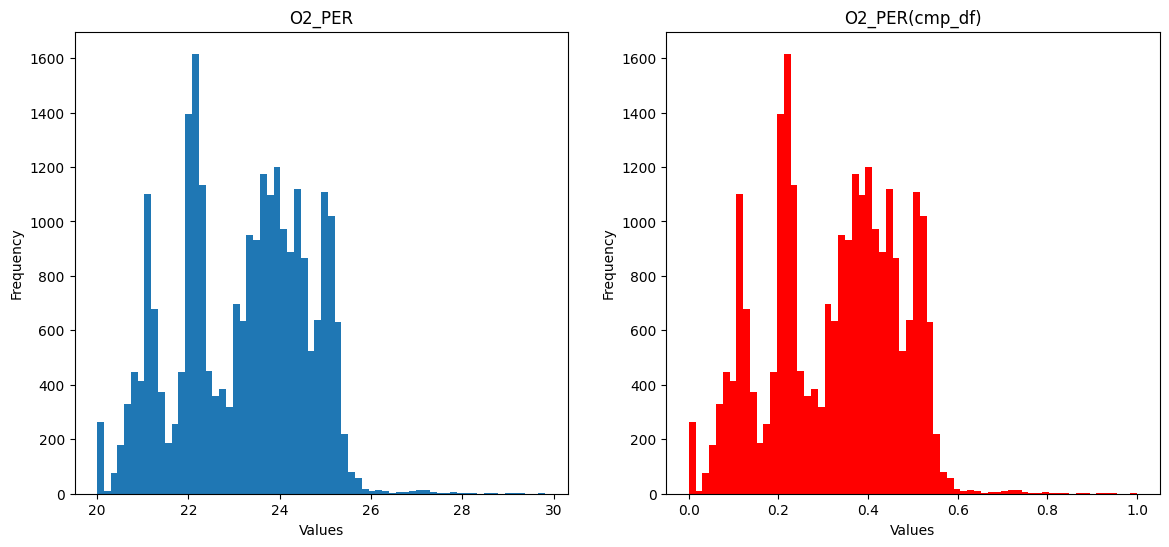

<Figure size 640x480 with 0 Axes>

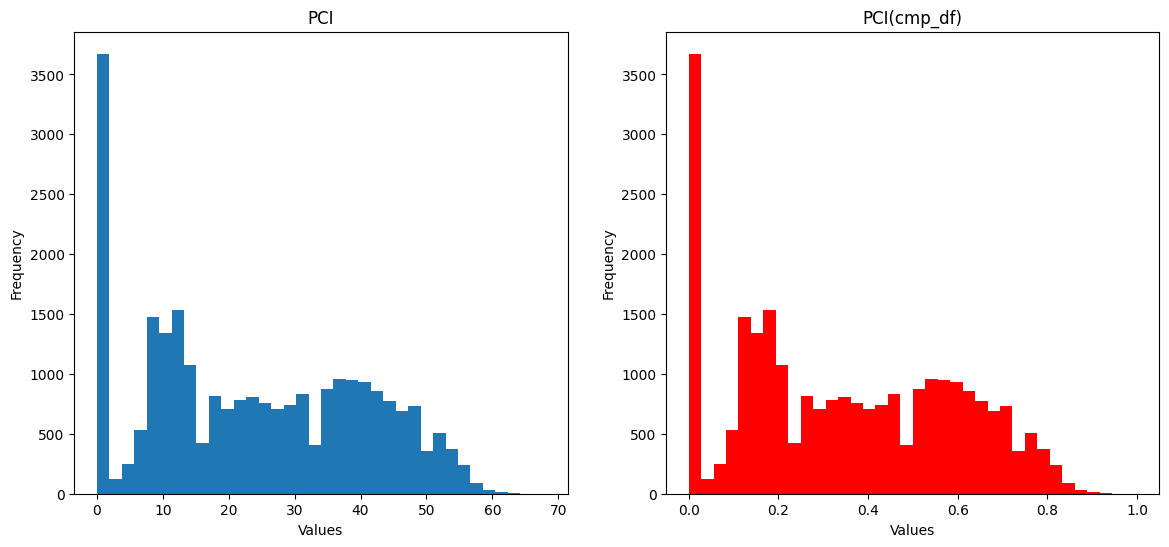

<Figure size 640x480 with 0 Axes>

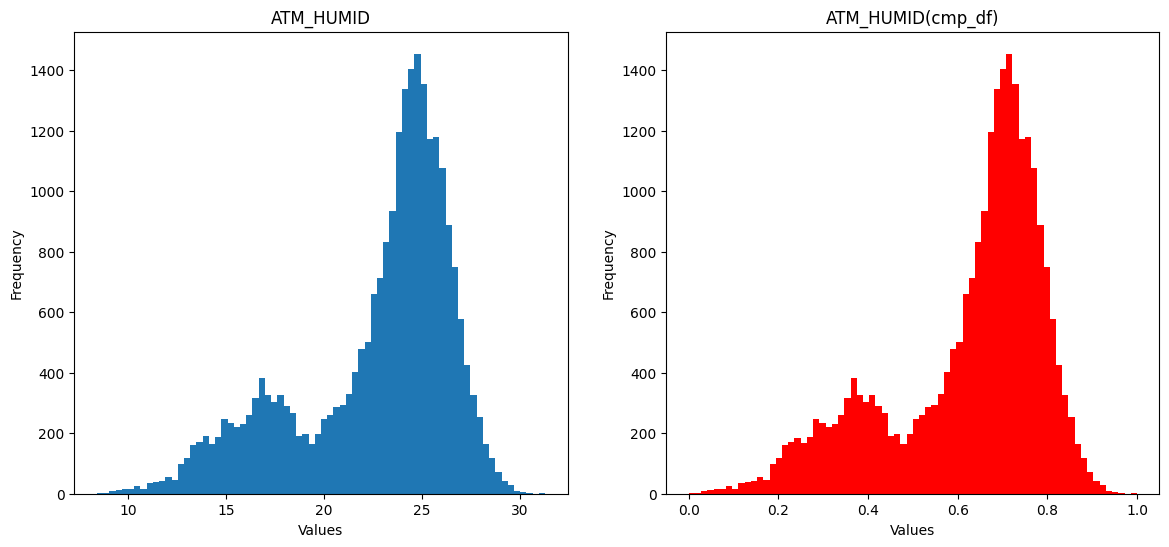

<Figure size 640x480 with 0 Axes>

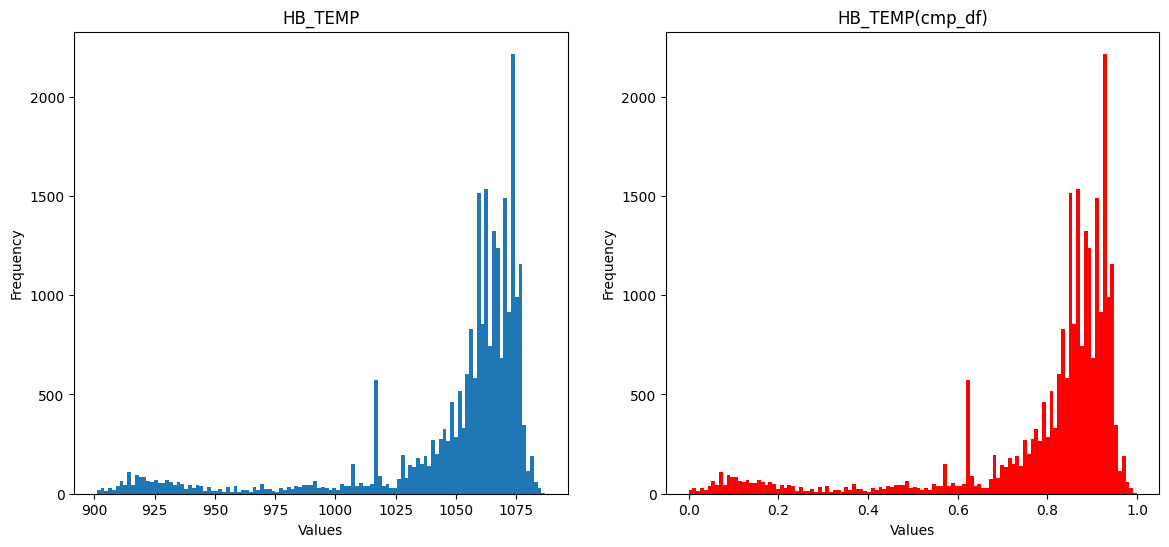

<Figure size 640x480 with 0 Axes>

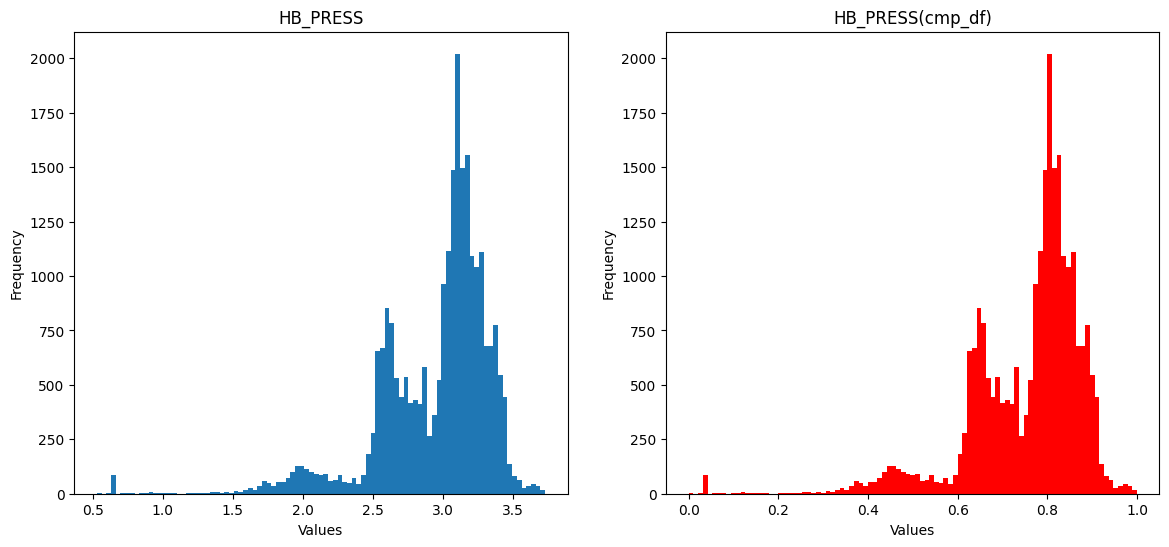

<Figure size 640x480 with 0 Axes>

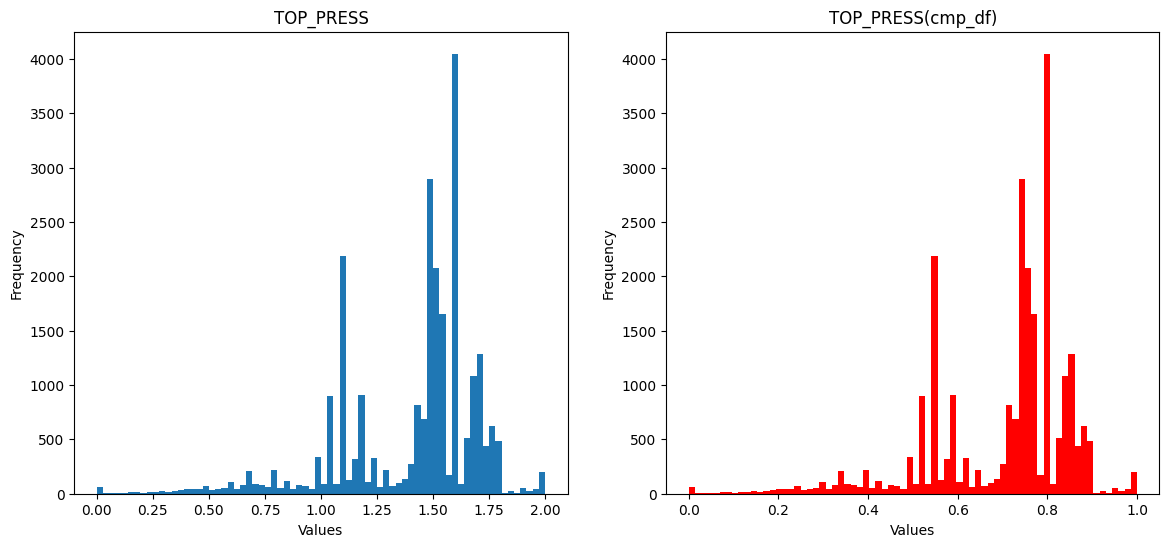

<Figure size 640x480 with 0 Axes>

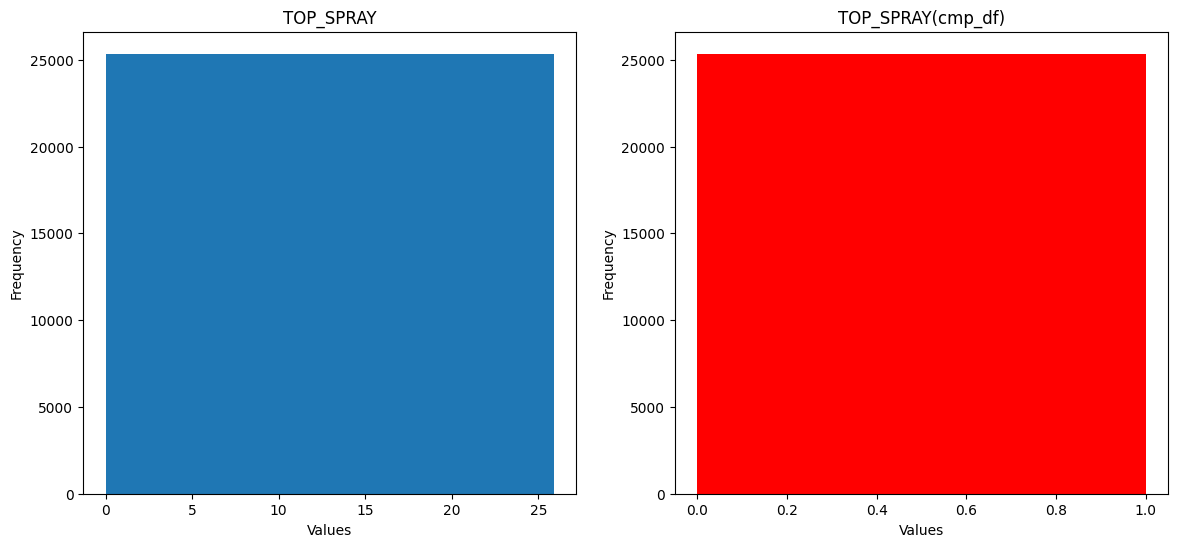

<Figure size 640x480 with 0 Axes>

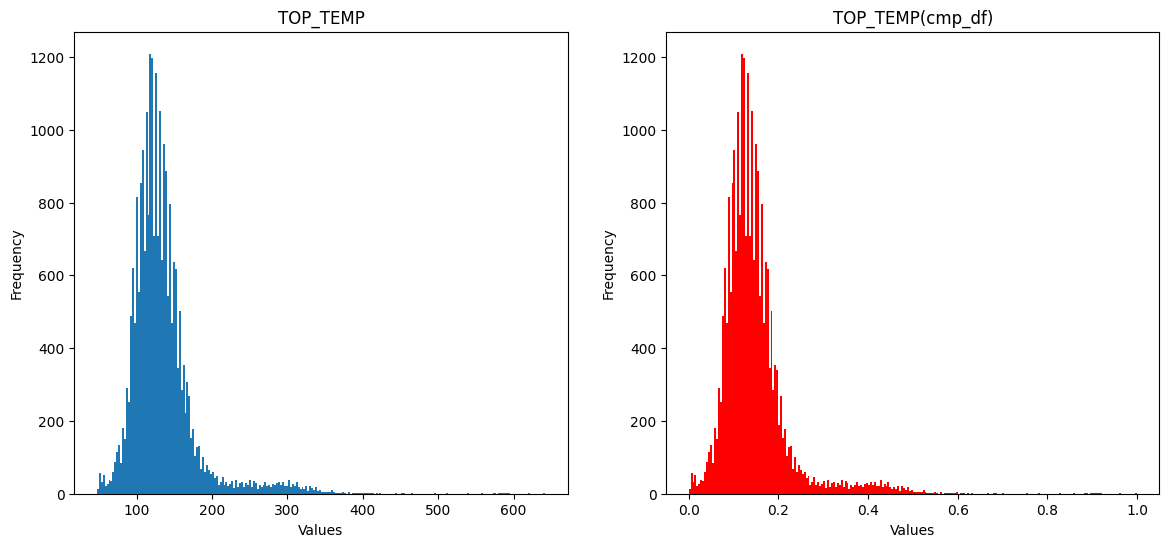

<Figure size 640x480 with 0 Axes>

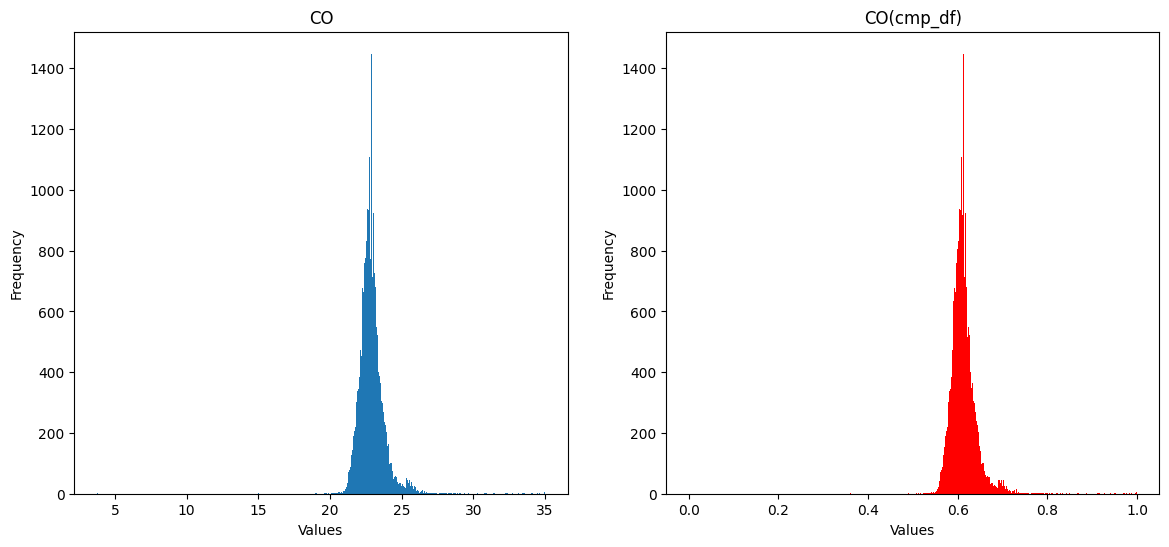

<Figure size 640x480 with 0 Axes>

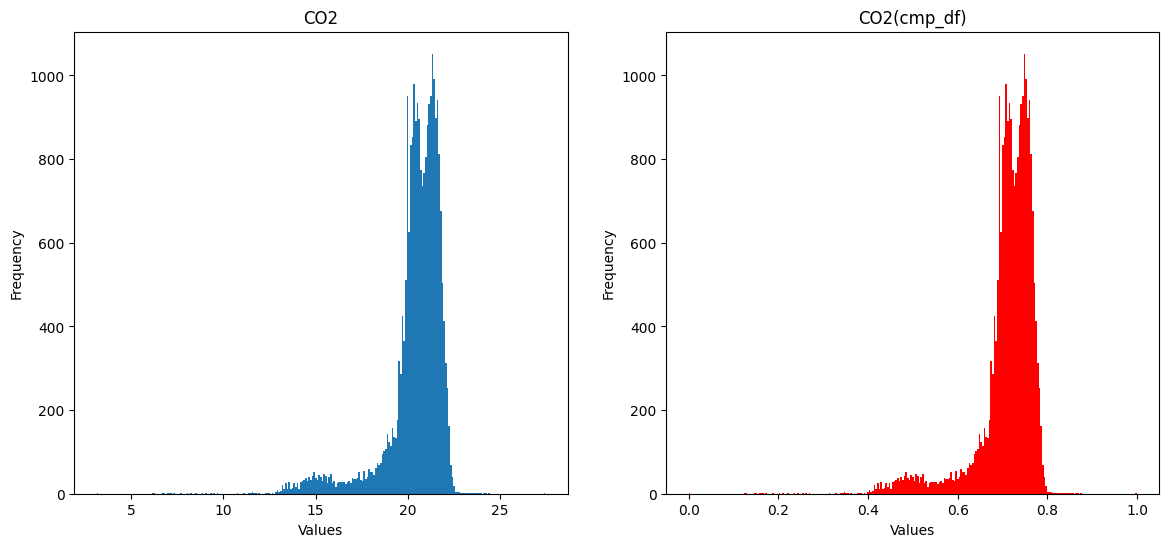

<Figure size 640x480 with 0 Axes>

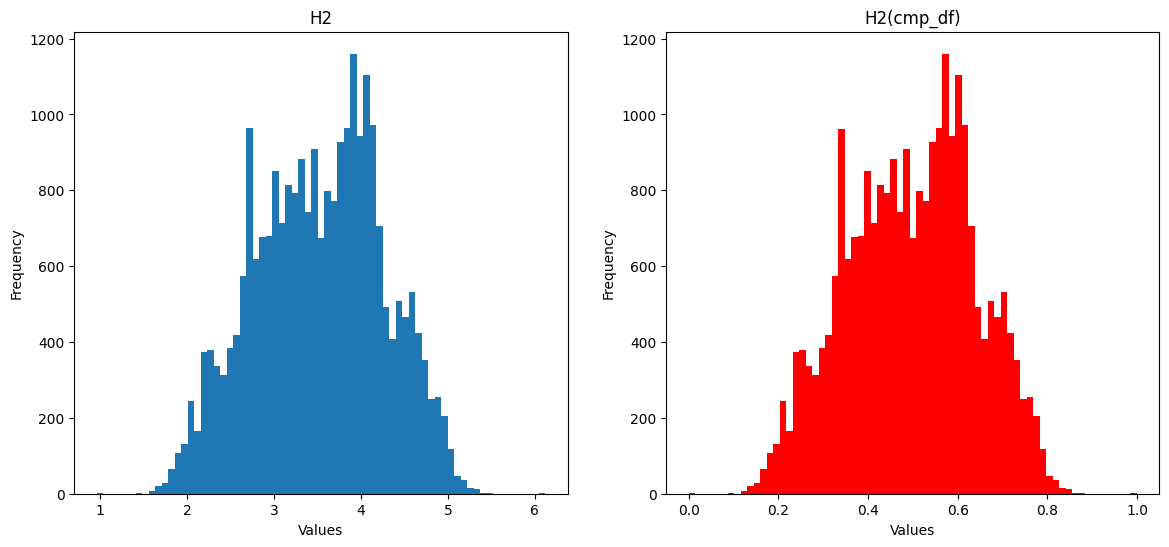

In [22]:
plot_vals(X, cmp_df = pd.DataFrame(MinMaxScaler().fit_transform(X), columns=X.columns))

C:\Users\TheStarSlayer\AppData\Local\Temp\ipykernel_15512\3525858470.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()  # Create a new figure for each feature


<Figure size 640x480 with 0 Axes>

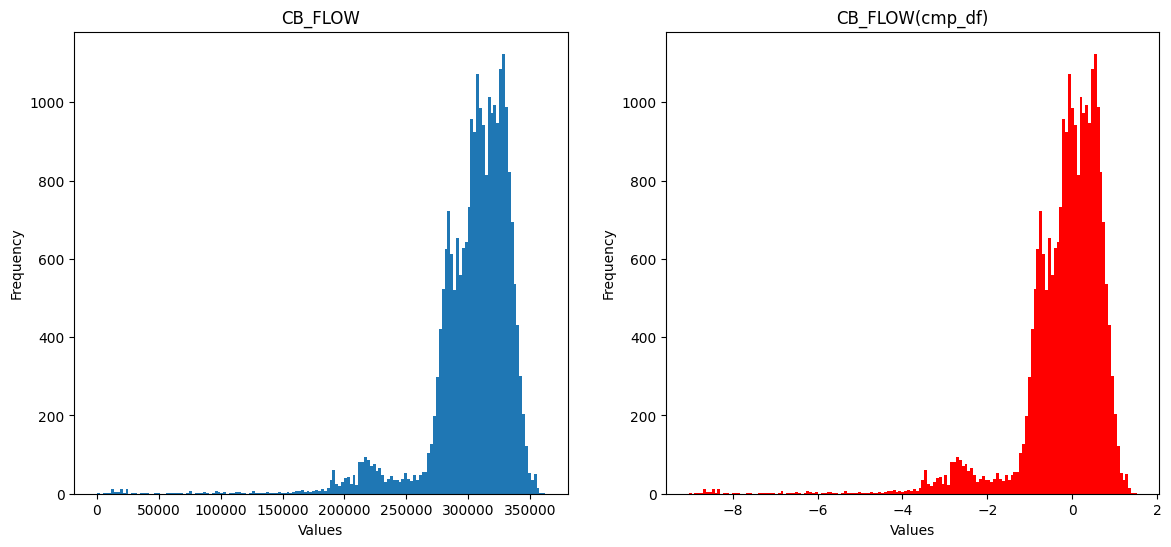

<Figure size 640x480 with 0 Axes>

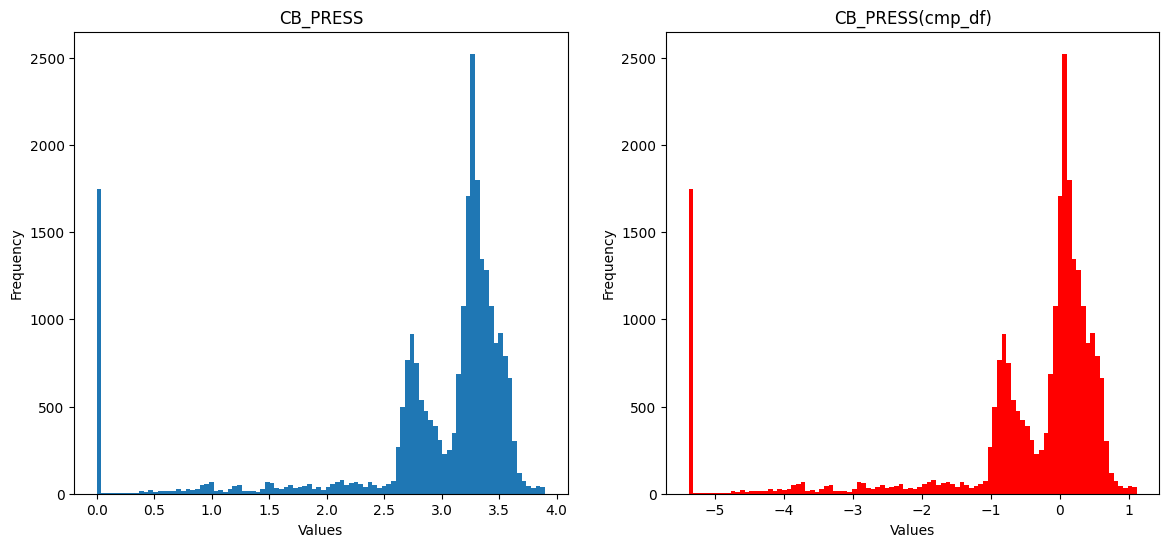

<Figure size 640x480 with 0 Axes>

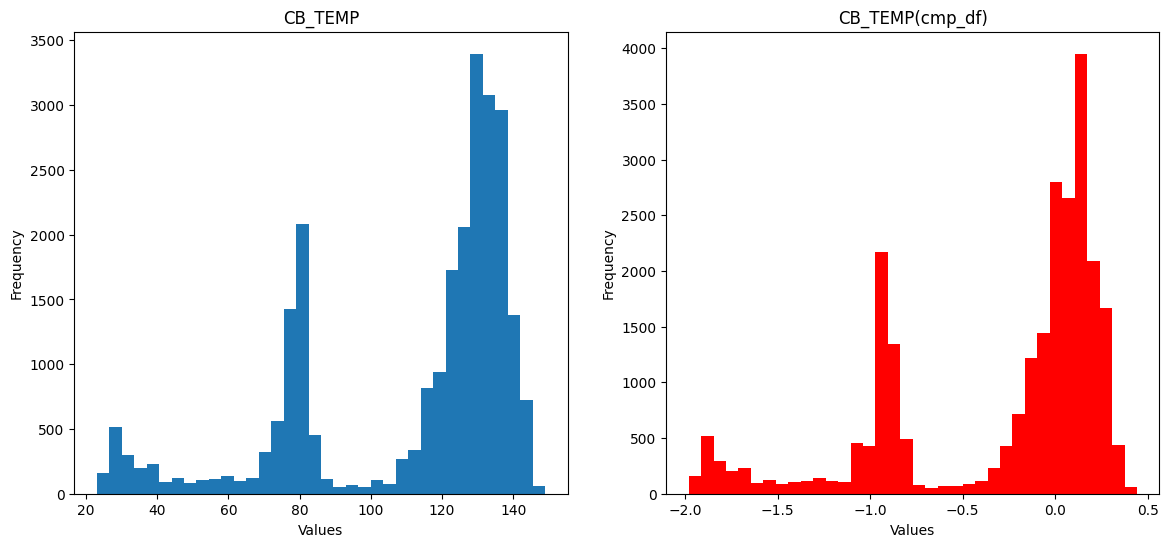

<Figure size 640x480 with 0 Axes>

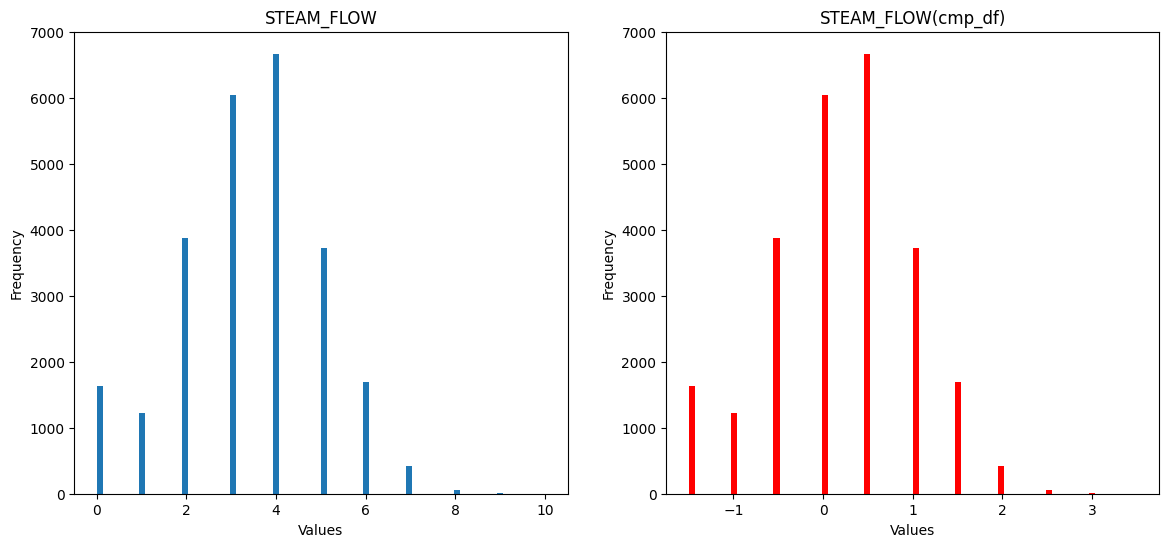

<Figure size 640x480 with 0 Axes>

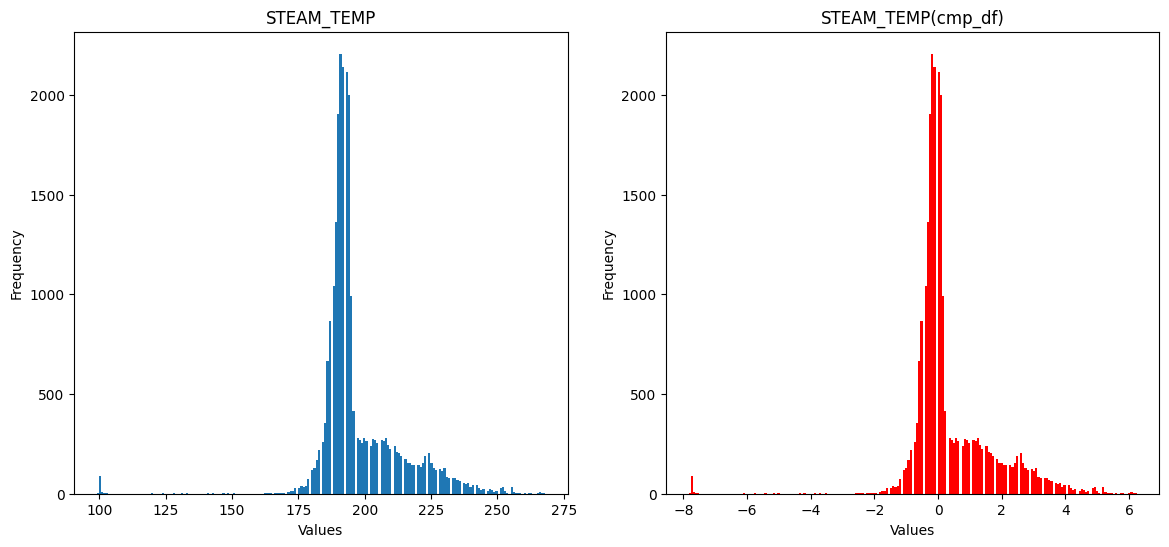

<Figure size 640x480 with 0 Axes>

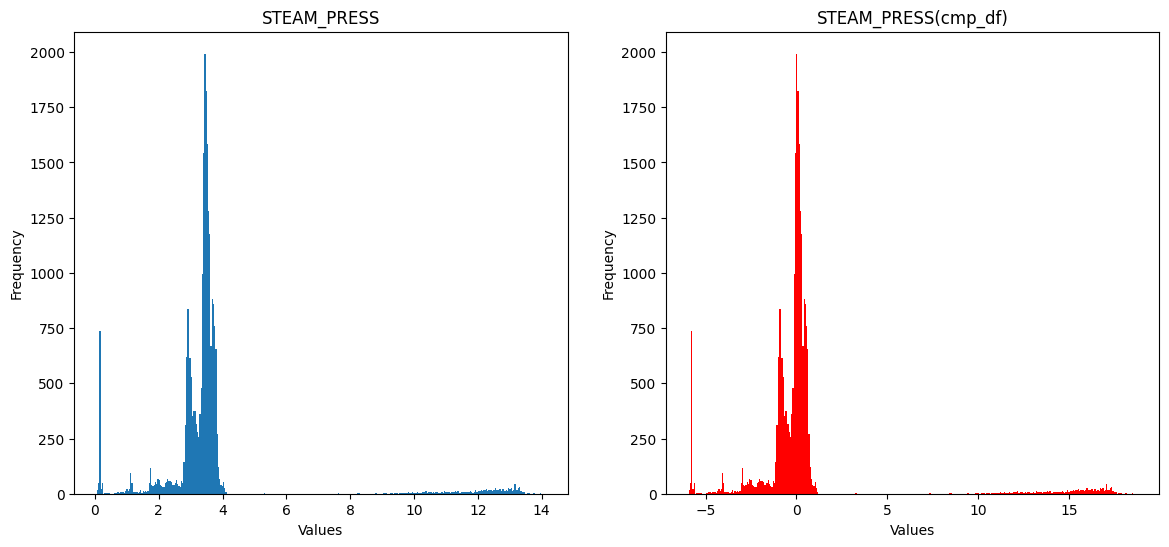

<Figure size 640x480 with 0 Axes>

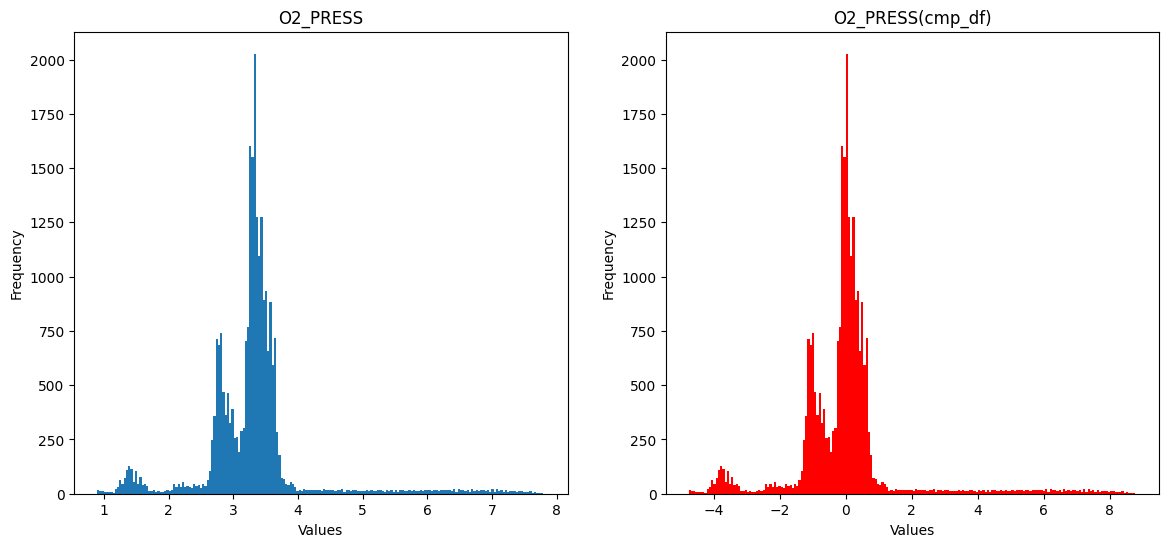

<Figure size 640x480 with 0 Axes>

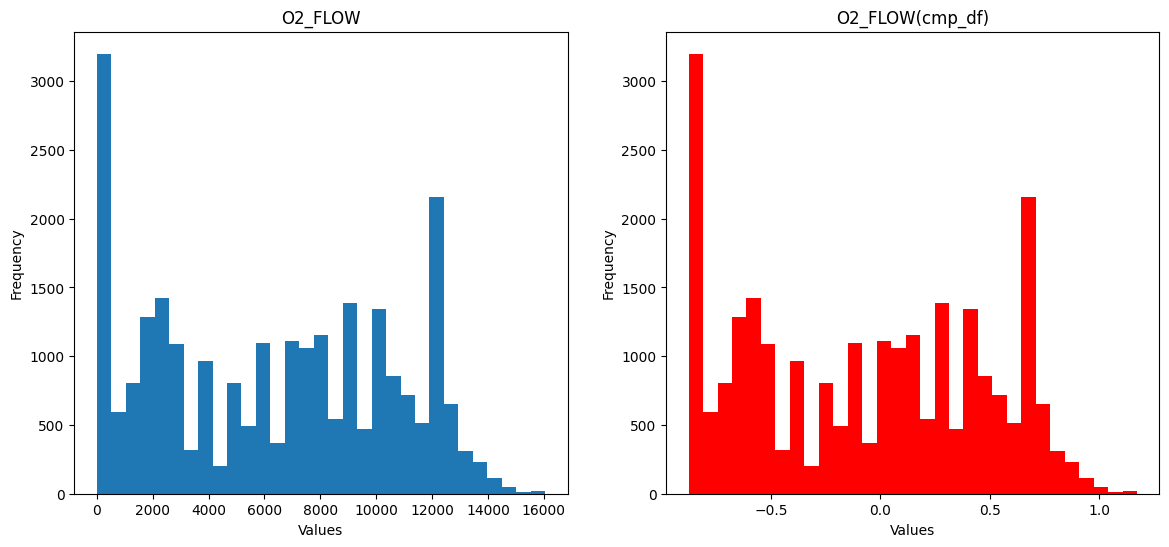

<Figure size 640x480 with 0 Axes>

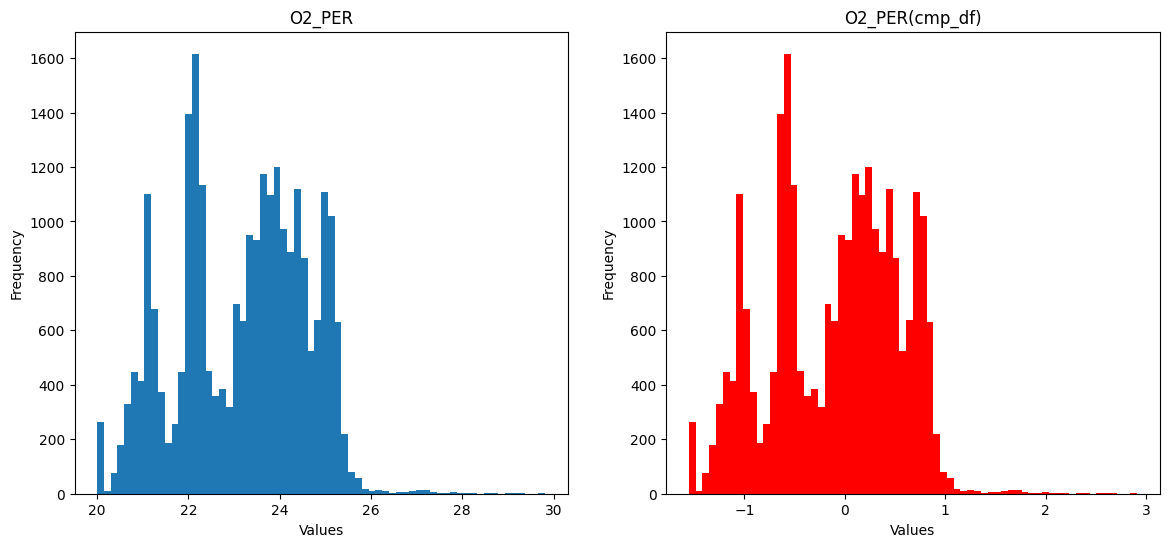

<Figure size 640x480 with 0 Axes>

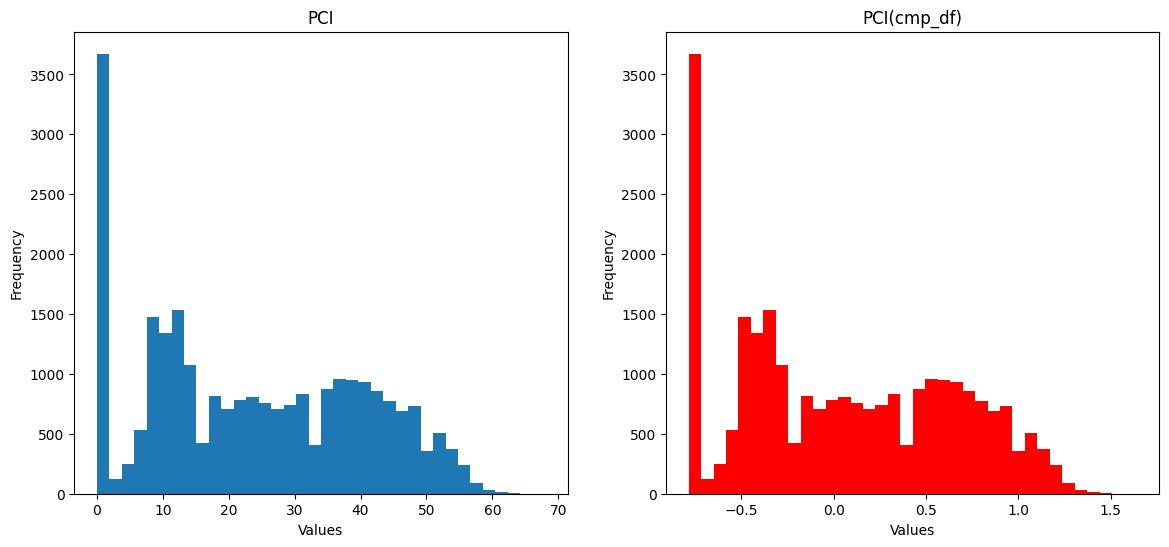

<Figure size 640x480 with 0 Axes>

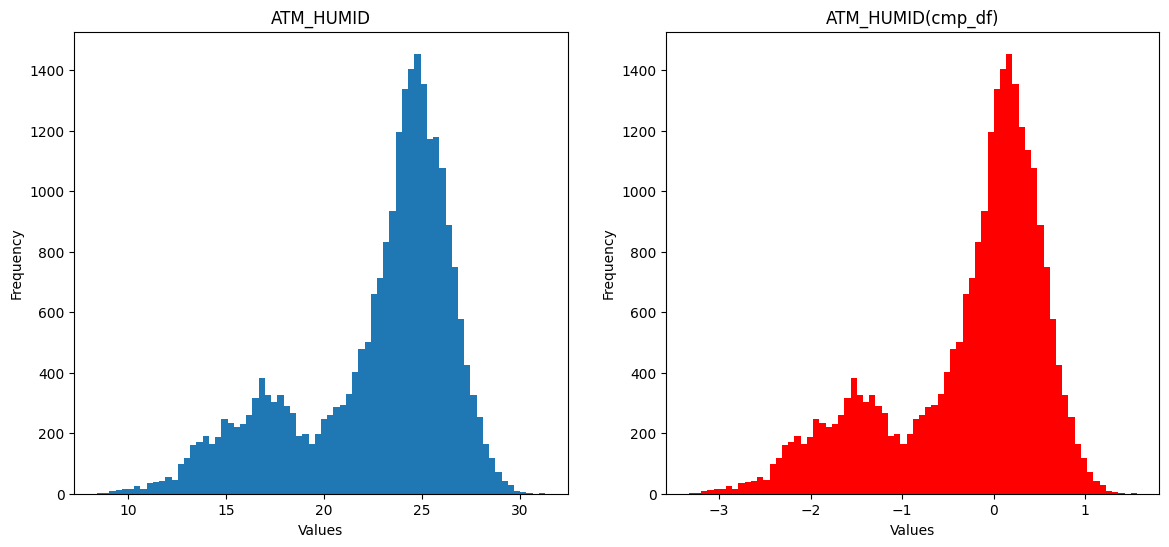

<Figure size 640x480 with 0 Axes>

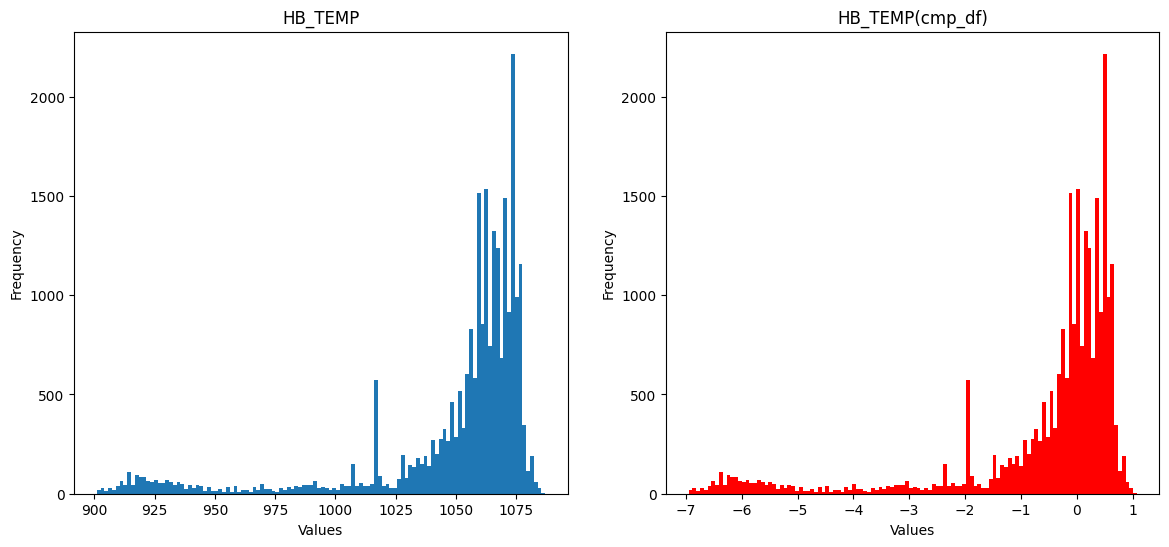

<Figure size 640x480 with 0 Axes>

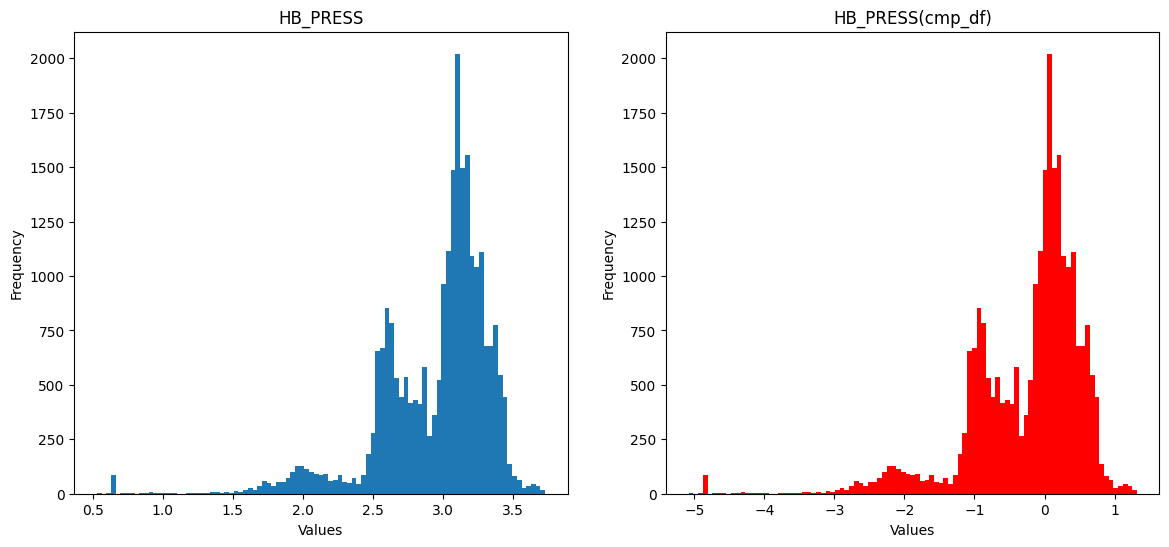

<Figure size 640x480 with 0 Axes>

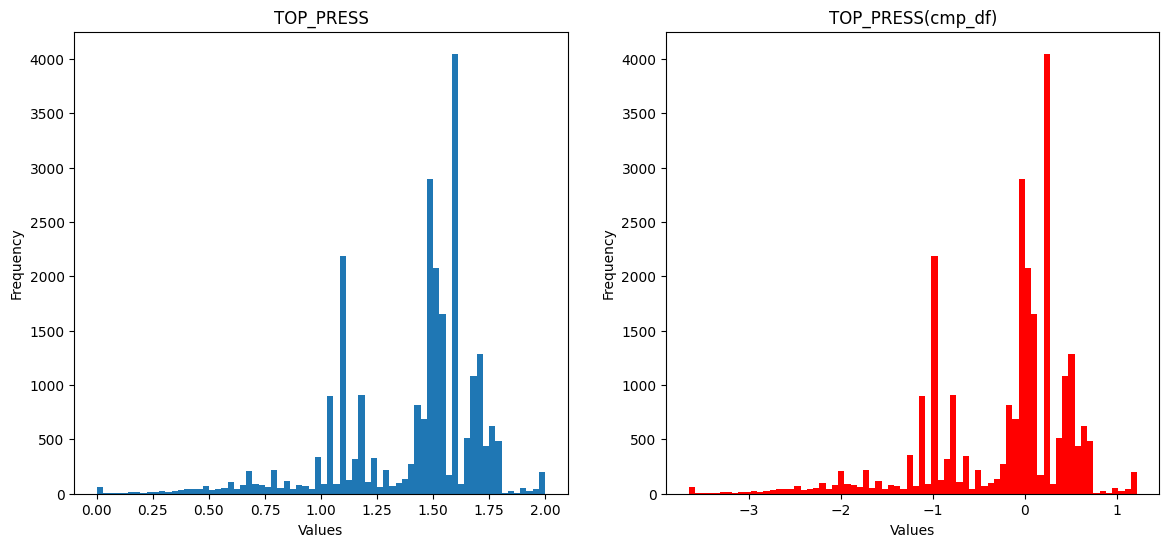

<Figure size 640x480 with 0 Axes>

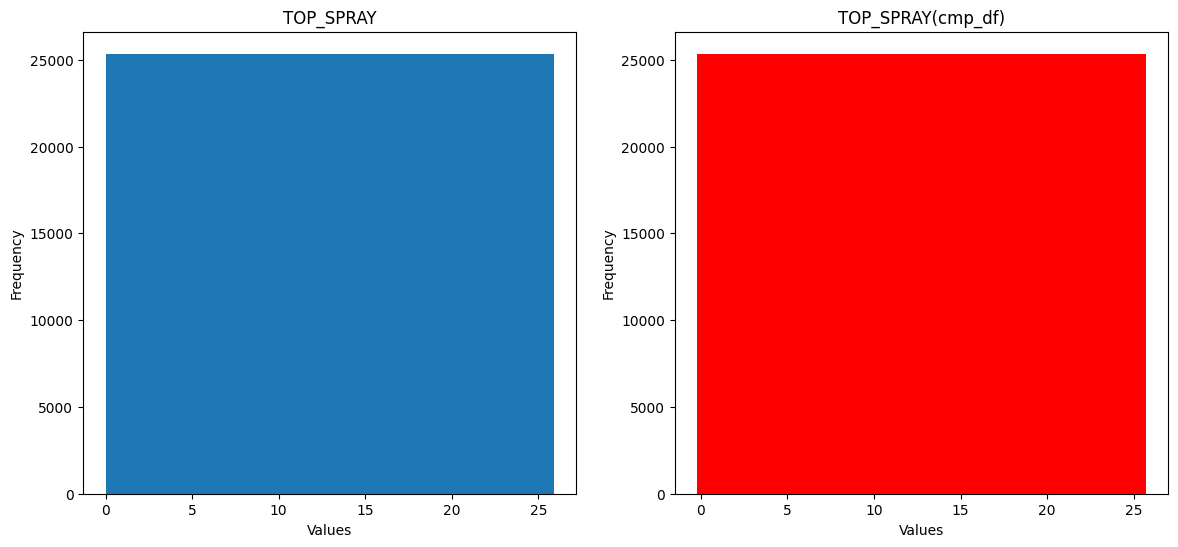

<Figure size 640x480 with 0 Axes>

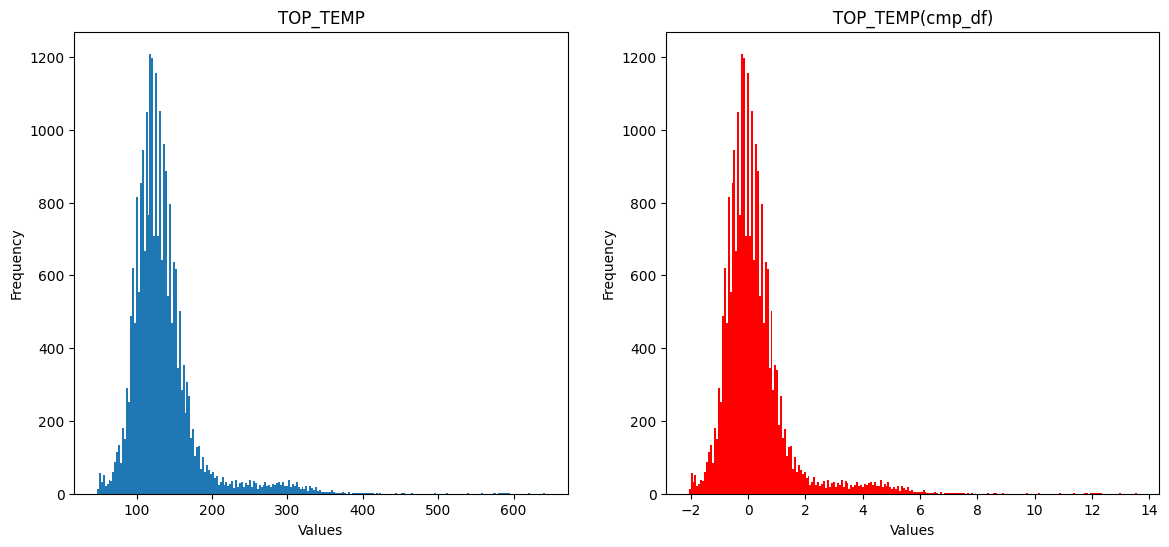

<Figure size 640x480 with 0 Axes>

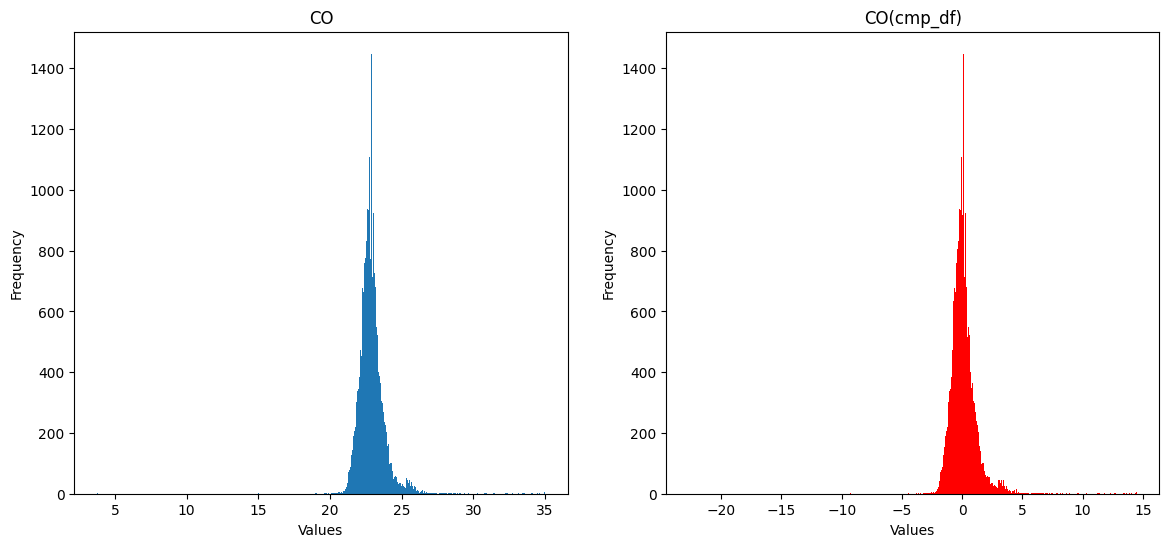

<Figure size 640x480 with 0 Axes>

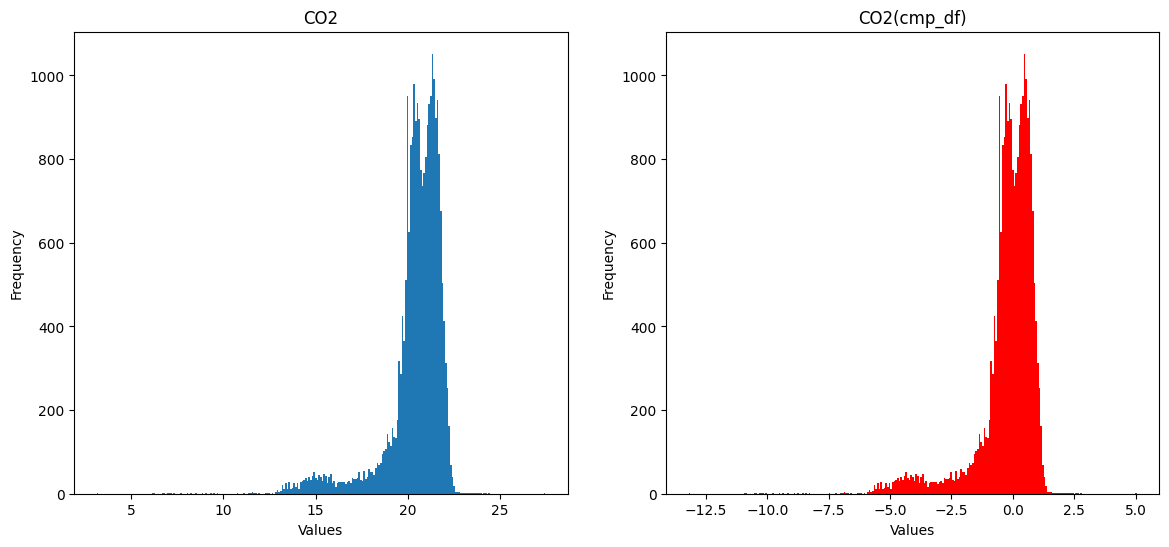

<Figure size 640x480 with 0 Axes>

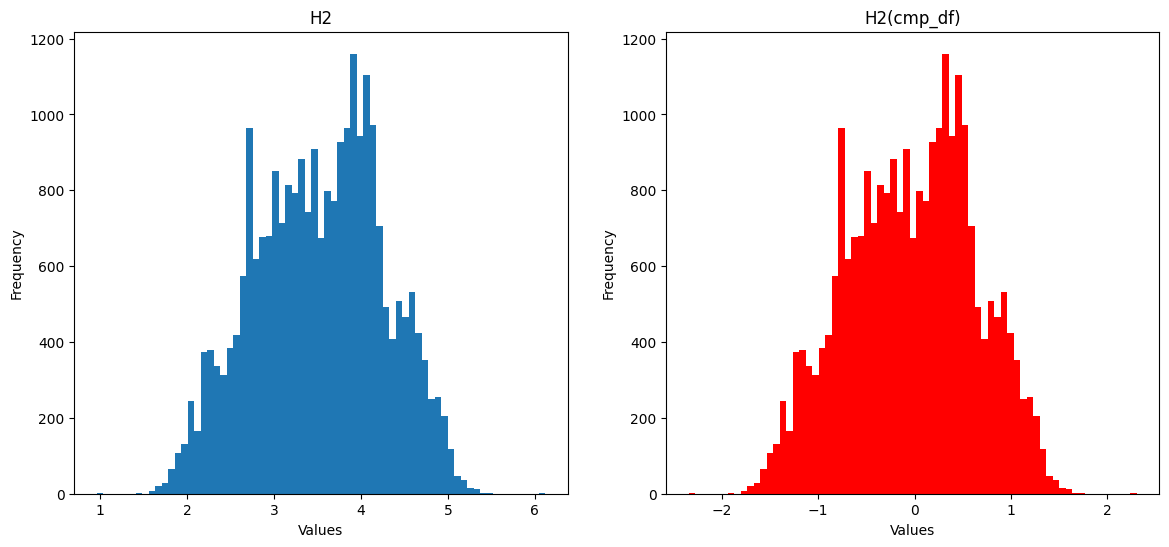

In [23]:
plot_vals(X, cmp_df = pd.DataFrame(RobustScaler().fit_transform(X), columns=X.columns))

#### We will use MinMaxScaler

### RANDOM FOREST ENSEMBLE FOR SKIN_TEMP_AVG

#### GridSearchCV for Hyperparameter tuning (Done in AWS SageMaker due to lack of computational power)

In [ ]:

rf_param_grid = {
    'regressor__n_estimators' : [x for x in range(100, 600, 100)],
    'regressor__max_depth' : [None, 10, 20, 30, 40, 50],
    'regressor__max_features' : ['auto', 'sqrt', 'log2', 0.3, 0.6, 0.9],
    'regressor__min_samples_split' : [2, 5, 10],
    'regressor__min_samples_leaf' : [1, 2, 4],
}

rf_pipeline = Pipeline([('scaler', MinMaxScaler()), ('regressor', RandomForestRegressor(random_state=42))])

rf_grid_search = GridSearchCV(rf_pipeline, rf_param_grid, cv = 5, scoring = ('r2', 'neg_mean_absolute_error', 'neg_mean_squared_error'), refit = 'neg_mean_squared_error', n_jobs = -1)
rf_grid_search.fit(X_train, y_train)

print(rf_grid_search.best_params_)
print(rf_grid_search.best_score_)


#### The following are the hyperparameters suiting best w.r.t mean squared error:
    - max_depth = 30
    - max_features = 0.3
    - n_estimators = 900

In [24]:
from sklearn.ensemble import RandomForestRegressor

rf_model = Pipeline(steps = [('scaler', MinMaxScaler()), ('regressor', RandomForestRegressor(max_depth=30, max_features = 0.3, n_estimators=900, random_state=42))]).fit(X_train, y_train)

In [25]:
y_pred = rf_model.predict(X_test)
print(mean_absolute_error(y_test, y_pred))
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

4.559635867372128
0.939028487127374
43.482861508645


- Regression type = Random Forest Regressor
- No. of estimators = 900
- Maximum features = 0.3
- Max_depth = 30

Score - 93.90%

MAE - 4.559

MSE - 43.482

### POLYNOMIAL REGRESSION for SKIN_TEMP_AVG

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

for i in range(1, 7):
    X_poly = PolynomialFeatures(degree=i).fit_transform(X_train)
    model = LinearRegression().fit(X_poly, y_train)
    X_poly_test = PolynomialFeatures(degree=i).fit_transform(X_test)
    y_pred = model.predict(X_poly_test)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(i, mae, r2)

- Degree: 5
- Regressor: Polynomial Regression
- MAE = 7.968
- R2 = 83.36%

Degree 6 and above, uses too much storage. Not feasible for deployment.

### KNN REGRESSOR for SKIN_TEMP_AVG

#### GridSearchCV done in AWS SageMaker

In [ ]:
knn_params = {
    'regressor__n_neighbors' : [x for x in range(1, 11)],
    'regressor__weights' : ['uniform', 'distance'],
    'regressor__algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'regressor__leaf_size' : [x for x in range(10, 51, 10)]
}

knn_pipeline = Pipeline([('scaler', MinMaxScaler()), ('regressor', KNeighborsRegressor())])
knn_grid_search = GridSearchCV(knn_pipeline, knn_params, cv = 5, scoring = ('r2', 'neg_mean_absolute_error', 'neg_mean_squared_error'), refit = 'neg_mean_squared_error', n_jobs = -1)
knn_grid_search.fit(X_train, y_train)

print(knn_grid_search.best_params_)
print(knn_grid_search.best_score_)


In [26]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = Pipeline([('scaler', MinMaxScaler()), ('regressor', KNeighborsRegressor(n_neighbors=2, weights='distance', algorithm='auto', leaf_size=10, p=1))]).fit(X_train, y_train)

In [27]:
y_pred = knn_model.predict(X_test)

print(mean_absolute_error(y_test, y_pred))
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

2.2994567960939944
0.9704996230954668
21.038690741894968


- Regression type = KNN Regressor
- Neighbors = 2
- Weights = Distance
- Algorithm = Auto
- Leaf size = 10
- p = 1

Score - 97.049%

MAE - 2.299

MSE - 21.038

#### KNN Model is the best after cross-validation and testing in terms of r2 score, MAE and MSE.

Now, we will generate 4 chained models each using the previous SKIN_TEMP_AVG column

### KNN

In [28]:
df.columns

Index(['DATE_TIME', 'CB_FLOW', 'CB_PRESS', 'CB_TEMP', 'STEAM_FLOW',
       'STEAM_TEMP', 'STEAM_PRESS', 'O2_PRESS', 'O2_FLOW', 'O2_PER', 'PCI',
       'ATM_HUMID', 'HB_TEMP', 'HB_PRESS', 'TOP_PRESS', 'TOP_SPRAY',
       'TOP_TEMP', 'CO', 'CO2', 'H2', 'SKIN_TEMP_AVG', 'SKIN_TEMP_AVG_1',
       'SKIN_TEMP_AVG_2', 'SKIN_TEMP_AVG_3', 'SKIN_TEMP_AVG_4'],
      dtype='object')

In [29]:
X.columns

Index(['CB_FLOW', 'CB_PRESS', 'CB_TEMP', 'STEAM_FLOW', 'STEAM_TEMP',
       'STEAM_PRESS', 'O2_PRESS', 'O2_FLOW', 'O2_PER', 'PCI', 'ATM_HUMID',
       'HB_TEMP', 'HB_PRESS', 'TOP_PRESS', 'TOP_SPRAY', 'TOP_TEMP', 'CO',
       'CO2', 'H2'],
      dtype='object')

In [31]:
for i in range(1,5):
    X_nxt_hr = X.copy(deep = True)
    if i-1 != 0:
        X_nxt_hr.loc[:, 'SKIN_TEMP_AVG'] = df['SKIN_TEMP_AVG_' + str(i-1)]
    else:
        X_nxt_hr.loc[:, 'SKIN_TEMP_AVG'] = df['SKIN_TEMP_AVG']

    y_nxt_hr = df['SKIN_TEMP_AVG_' + str(i)]

    X_train, X_test, y_train, y_test = train_test_split(X_nxt_hr, y_nxt_hr, test_size=0.2, random_state=42)

    print('r2: ' + str(r2_score(y_test, y_pred)))
    print('mae: ' + str(mean_absolute_error(y_test, y_pred)))
    print('mse: ' + str(mean_squared_error(y_test, y_pred)))

r2: 0.9696763715537782
mae: 2.285217303532388
mse: 21.37588137540124
r2: 0.9709331472706029
mae: 2.2915835640442404
mse: 21.369601747207803
r2: 0.9706332415511526
mae: 2.3144091934040256
mse: 21.695004907071855
r2: 0.9727778676489439
mae: 2.2622898544092234
mse: 20.26573774528281


### KNN Chained Models:
- Current hr = 97.05%
- 1 hr = 96.96%
- 2 hr = 97.09%
- 3 hr = 97.06%
- 4 hr = 97.27%

Chained model accuracy is 97.086%

### EXPORT KNN MODELS

In [32]:
import joblib

joblib.dump(knn_1hr_models, 'knn_1hr_models.pk1')

['knn_1hr_models.pk1']

#### Check if loading pk1 again works as intended

In [35]:
knn_temp_model = joblib.load('knn_1hr_models.pk1')

for i in range(1,5):
    X_nxt_hr = X.copy(deep = True)
    if i-1 != 0:
        X_nxt_hr.loc[:, 'SKIN_TEMP_AVG'] = df['SKIN_TEMP_AVG_' + str(i-1)]
    else:
        X_nxt_hr.loc[:, 'SKIN_TEMP_AVG'] = df['SKIN_TEMP_AVG']

    y_nxt_hr = df['SKIN_TEMP_AVG_' + str(i)]

    X_train, X_test, y_train, y_test = train_test_split(X_nxt_hr, y_nxt_hr, test_size=0.2, random_state=42)
    y_pred = knn_temp_model[i].predict(X_test)

    print('r2: ' + str(r2_score(y_test, y_pred)))
    print('mae: ' + str(mean_absolute_error(y_test, y_pred)))
    print('mse: ' + str(mean_squared_error(y_test, y_pred)))

Y_pred = knn_temp_model[0].predict(X)
print(r2_score(y, Y_pred))

r2: 0.9696763715537782
mae: 2.285217303532388
mse: 21.37588137540124
r2: 0.9709331472706029
mae: 2.2915835640442404
mse: 21.369601747207803
r2: 0.9706332415511526
mae: 2.3144091934040256
mse: 21.695004907071855
r2: 0.9727778676489439
mae: 2.2622898544092234
mse: 20.26573774528281
0.9941587321164502


# WORKS AS INTENDED